In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
# from verstack import FeatureSelector

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
economyData = pd.read_csv("C:/Users/ROG/Desktop/Data Science Research Project/CSGO kaggle/economy.csv")
playersData = pd.read_csv("C:/Users/ROG/Desktop/Data Science Research Project/CSGO kaggle/players.csv")
picksData = pd.read_csv("C:/Users/ROG/Desktop/Data Science Research Project/CSGO kaggle/picks.csv")
resultsData = pd.read_csv("C:/Users/ROG/Desktop/Data Science Research Project/CSGO kaggle/results.csv")

C:\Users\ROG\AppData\Local\Temp\ipykernel_14556\762717271.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  economyData = pd.read_csv("C:/Users/ROG/Desktop/Data Science Research Project/CSGO kaggle/economy.csv")


In [4]:
economyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43234 entries, 0 to 43233
Data columns (total 99 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43234 non-null  object 
 1   match_id   43234 non-null  int64  
 2   event_id   43234 non-null  int64  
 3   team_1     43234 non-null  object 
 4   team_2     43234 non-null  object 
 5   best_of    43234 non-null  object 
 6   _map       43234 non-null  object 
 7   t1_start   43234 non-null  object 
 8   t2_start   43234 non-null  object 
 9   1_t1       43234 non-null  float64
 10  2_t1       43234 non-null  float64
 11  3_t1       43234 non-null  float64
 12  4_t1       43234 non-null  float64
 13  5_t1       43234 non-null  float64
 14  6_t1       43234 non-null  float64
 15  7_t1       43234 non-null  float64
 16  8_t1       43234 non-null  float64
 17  9_t1       43234 non-null  float64
 18  10_t1      43234 non-null  float64
 19  11_t1      43234 non-null  float64
 20  12_t1 

In [5]:
playersData.iloc[:, 1:].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383317 entries, 0 to 383316
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   player_name       383316 non-null  object 
 1   team              383317 non-null  object 
 2   opponent          383317 non-null  object 
 3   country           383317 non-null  object 
 4   player_id         383317 non-null  int64  
 5   match_id          383317 non-null  int64  
 6   event_id          383317 non-null  int64  
 7   event_name        383317 non-null  object 
 8   best_of           383317 non-null  int64  
 9   map_1             383317 non-null  object 
 10  map_2             196523 non-null  object 
 11  map_3             68678 non-null   object 
 12  kills             383317 non-null  int64  
 13  assists           383317 non-null  int64  
 14  deaths            383317 non-null  int64  
 15  hs                383317 non-null  int64  
 16  flash_assists     2

In [6]:
picksData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16035 entries, 0 to 16034
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            16035 non-null  object
 1   team_1          16035 non-null  object
 2   team_2          16035 non-null  object
 3   inverted_teams  16035 non-null  int64 
 4   match_id        16035 non-null  int64 
 5   event_id        16035 non-null  int64 
 6   best_of         16035 non-null  object
 7   system          16035 non-null  int64 
 8   t1_removed_1    16035 non-null  object
 9   t1_removed_2    16035 non-null  object
 10  t1_removed_3    16035 non-null  object
 11  t2_removed_1    16035 non-null  object
 12  t2_removed_2    16035 non-null  object
 13  t2_removed_3    16035 non-null  object
 14  t1_picked_1     16035 non-null  object
 15  t2_picked_1     16035 non-null  object
 16  left_over       16035 non-null  object
dtypes: int64(4), object(13)
memory usage: 2.1+ MB


In [7]:
resultsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45773 entries, 0 to 45772
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          45773 non-null  object
 1   team_1        45773 non-null  object
 2   team_2        45773 non-null  object
 3   _map          45773 non-null  object
 4   result_1      45773 non-null  int64 
 5   result_2      45773 non-null  int64 
 6   map_winner    45773 non-null  int64 
 7   starting_ct   45773 non-null  int64 
 8   ct_1          45773 non-null  int64 
 9   t_2           45773 non-null  int64 
 10  t_1           45773 non-null  int64 
 11  ct_2          45773 non-null  int64 
 12  event_id      45773 non-null  int64 
 13  match_id      45773 non-null  int64 
 14  rank_1        45773 non-null  int64 
 15  rank_2        45773 non-null  int64 
 16  map_wins_1    45773 non-null  int64 
 17  map_wins_2    45773 non-null  int64 
 18  match_winner  45773 non-null  int64 
dtypes: i

In [8]:
economyData.head()

,date,match_id,event_id,team_1,team_2,best_of,_map,t1_start,t2_start,1_t1,2_t1,3_t1,4_t1,5_t1,6_t1,7_t1,8_t1,9_t1,10_t1,11_t1,12_t1,13_t1,14_t1,15_t1,16_t1,17_t1,18_t1,19_t1,20_t1,21_t1,22_t1,23_t1,24_t1,25_t1,26_t1,27_t1,28_t1,29_t1,30_t1,1_t2,2_t2,3_t2,4_t2,5_t2,6_t2,7_t2,8_t2,9_t2,10_t2,11_t2,12_t2,13_t2,14_t2,15_t2,16_t2,17_t2,18_t2,19_t2,20_t2,21_t2,22_t2,23_t2,24_t2,25_t2,26_t2,27_t2,28_t2,29_t2,30_t2,1_winner,2_winner,3_winner,4_winner,5_winner,6_winner,7_winner,8_winner,9_winner,10_winner,11_winner,12_winner,13_winner,14_winner,15_winner,16_winner,17_winner,18_winner,19_winner,20_winner,21_winner,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner
0,2020-03-01,2339402,4901,G2,Natus Vincere,5,Nuke,t,ct,4350.0,1100.0,22100.0,9350.0,25750.0,10400.0,24600.0,8150.0,26700.0,23400.0,4300.0,25900.0,11950.0,24850.0,21900.0,4150.0,10650.0,27300.0,27000.0,30950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4250.0,20250.0,24600.0,29300.0,30650.0,31450.0,32050.0,31450.0,32050.0,30950.0,29300.0,30200.0,31550.0,32350.0,33050.0,4250.0,20300.0,8250.0,1300.0,22200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-01,2339402,4901,G2,Natus Vincere,5,Dust2,ct,t,3900.0,7400.0,23250.0,28500.0,31900.0,31700.0,18950.0,30200.0,28650.0,30350.0,30150.0,11100.0,23700.0,8550.0,26350.0,4050.0,9400.0,21900.0,12700.0,11300.0,3100.0,26250.0,21300.0,23950.0,27450.0,27550.0,28050.0,26250.0,26250.0,NaN,3500.0,18550.0,7300.0,1500.0,21800.0,12000.0,21050.0,24450.0,6850.0,26850.0,23100.0,25650.0,26800.0,26750.0,28250.0,4000.0,18850.0,15850.0,23000.0,26850.0,29100.0,26300.0,26850.0,19050.0,3500.0,26450.0,27450.0,27500.0,29050.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN
2,2020-03-01,2339402,4901,G2,Natus Vincere,5,Mirage,t,ct,4150.0,14300.0,2000.0,24800.0,9000.0,23150.0,21850.0,23700.0,10450.0,26250.0,8800.0,24950.0,12100.0,24350.0,18250.0,4300.0,19400.0,8900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4200.0,21200.0,24150.0,27050.0,31350.0,30650.0,31050.0,28150.0,29650.0,30950.0,31550.0,32950.0,32250.0,31650.0,33350.0,4350.0,14300.0,22850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Dust2,t,ct,4150.0,18050.0,21000.0,25850.0,25000.0,25000.0,27250.0,26150.0,26300.0,27850.0,26750.0,27450.0,27850.0,18300.0,27850.0,4000.0,21100.0,9100.0,3100.0,22100.0,23350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4250.0,9300.0,2100.0,19300.0,27250.0,9850.0,24800.0,12200.0,27550.0,26100.0,7450.0,27650.0,24500.0,19100.0,18050.0,4150.0,15100.0,18450.0,23150.0,28150.0,27850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-29,2339401,4901,Natus Vincere,Astralis,3,Nuke,ct,t,4200.0,10000.0,22000.0,24500.0,27550.0,29350.0,31950.0,31850.0,31750.0,32850.0,32150.0,31750.0,31850.0,33050.0,33150.0,4250.0,3000.0,21150.0,11750.0,28050.0,25900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4200.0,17950.0,9050.0,1000.0,22850.0,7500.0,24400.0,24700.0,9700.0,27150.0,21850.0,21900.0,8150.0,25200.0,20450.0,4300.0,19300.0,27400.0,31700.0,29650.0,12150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
playersData.head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,map_1,map_2,map_3,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating,m3_kills,m3_assists,m3_deaths,m3_hs,m3_flash_assists,m3_kast,m3_kddiff,m3_adr,m3_fkdiff,m3_rating,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,m1_kills_ct,m1_deaths_ct,m1_kddiff_ct,m1_adr_ct,m1_kast_ct,m1_rating_ct,m1_kills_t,m1_deaths_t,m1_kddiff_t,m1_adr_t,m1_kast_t,m1_rating_t,m2_kills_ct,m2_deaths_ct,m2_kddiff_ct,m2_adr_ct,m2_kast_ct,m2_rating_ct,m2_kills_t,m2_deaths_t,m2_kddiff_t,m2_adr_t,m2_kast_t,m2_rating_t,m3_kills_ct,m3_deaths_ct,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,57,14,61,29,0.0,71.1,-4,79.9,0,1.04,11,3,18,5,0.0,65.2,-7,60.8,-1,0.70,30.0,7.0,24.0,16.0,0.0,73.5,6.0,99.2,6.0,1.38,16.0,4.0,19.0,8.0,0.0,73.1,-3.0,71.6,-5.0,0.91,34.0,30.0,4.0,81.6,79.2,1.10,23.0,31.0,-8.0,77.5,60.0,0.97,8.0,10.0,-2.0,76.3,73.3,0.90,3.0,8.0,-5.0,31.9,50.0,0.34,17.0,10.0,7.0,93.7,83.3,1.41,13.0,14.0,-1.0,105.3,62.5,1.35,9.0,10.0,-1.0,72.5,80.0,0.93,7.0,9.0,-2.0,70.4,63.6,0.89
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,54,10,54,18,4.0,65.1,0,71.7,2,0.98,11,2,17,4,2.0,60.9,-6,68.9,-1,0.75,26.0,6.0,19.0,8.0,1.0,76.5,7.0,80.1,3.0,1.24,17.0,2.0,18.0,6.0,1.0,53.8,-1.0,63.1,0.0,0.87,37.0,25.0,12.0,77.4,72.9,1.16,17.0,29.0,-12.0,63.9,54.3,0.73,9.0,9.0,0.0,72.3,73.3,0.88,2.0,8.0,-6.0,62.4,37.5,0.50,15.0,6.0,9.0,79.8,88.9,1.45,11.0,13.0,-2.0,80.5,62.5,1.00,13.0,10.0,3.0,79.5,53.3,1.12,4.0,8.0,-4.0,40.7,54.5,0.53
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,55,10,51,28,1.0,67.5,4,77.9,1,1.08,15,3,12,9,0.0,69.6,3,77.0,3,1.32,24.0,3.0,24.0,14.0,0.0,64.7,0.0,72.9,-1.0,0.97,16.0,4.0,15.0,5.0,1.0,69.2,1.0,85.2,-1.0,1.04,31.0,17.0,14.0,96.6,71.4,1.39,24.0,34.0,-10.0,64.2,64.6,0.86,11.0,2.0,9.0,135.2,75.0,2.17,4.0,10.0,-6.0,45.9,66.7,0.87,13.0,9.0,4.0,87.6,75.0,1.26,11.0,15.0,-4.0,59.7,55.6,0.71,7.0,6.0,1.0,81.5,63.6,1.03,9.0,9.0,0.0,87.9,73.3,1.05
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,43,5,54,18,2.0,65.1,-11,58.7,-4,0.83,11,1,15,6,1.0,65.2,-4,60.7,-2,0.73,22.0,3.0,21.0,8.0,1.0,70.6,1.0,67.9,-2.0,1.00,10.0,1.0,18.0,4.0,0.0,57.7,-8.0,45.0,0.0,0.69,33.0,23.0,10.0,74.0,75.0,1.11,10.0,31.0,-21.0,37.8,51.4,0.43,9.0,8.0,1.0,68.3,73.3,0.92,2.0,7.0,-5.0,46.5,50.0,0.38,15.0,6.0,9.0,84.3,83.3,1.40,7.0,15.0,-8.0,49.3,56.2,0.55,9.0,9.0,0.0,67.2,66.7,0.97,1.0,9.0,-8.0,14.8,45.5,0.31
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,52,22,46,23,9.0,77.1,6,75.9,-1,1.08,10,5,12,3,3.0,65.2,-2,51.5,0,0.83,29.0,6.0,21.0,16.0,0.0,82.4,8.0,101.9,0.0,1.35,13.0,11.0,13.0,4.0,6.0,80.8,0.0,63.3,-1.0,0.98,28.0,17.0,11.0,96.3,85.7,1.36,24.0,29.0,-5.0,61.0,70.8,0.87,4.0,3.0,1.0,64.8,62.5,0.98,6.0,9.0,-3.0,44.4,66.7,0.75,19.0,8.0,11.0,128.1,100.0,1.88,10.0,13.0,-3.0,78.7,66.7,0.89,5.0,6.0,-1.0,72.9,81.8,0.96,8.0,7.0,1.0,56.3,80.0,0.99


In [10]:
picksData.head()

,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over
0,2020-03-18,TeamOne,Recon 5,1,2340454,5151,3,123412,Vertigo,Train,0.0,Nuke,Overpass,0.0,Dust2,Inferno,Mirage
1,2020-03-18,Rugratz,Bad News Bears,0,2340453,5151,3,123412,Dust2,Nuke,0.0,Mirage,Train,0.0,Vertigo,Inferno,Overpass
2,2020-03-18,New England Whalers,Station7,0,2340461,5243,1,121212,Mirage,Dust2,Vertigo,Nuke,Train,Overpass,0.0,0.0,Inferno
3,2020-03-17,Complexity,forZe,1,2340279,5226,3,123412,Inferno,Nuke,0.0,Overpass,Vertigo,0.0,Dust2,Train,Mirage
4,2020-03-17,Singularity,Endpoint,0,2340456,5247,3,123412,Train,Mirage,0.0,Nuke,Inferno,0.0,Overpass,Vertigo,Dust2


In [11]:
resultsData.head()

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
0,2020-03-18,Recon 5,TeamOne,Dust2,0,16,2,2,0,1,0,15,5151,2340454,62,63,0,2,2
1,2020-03-18,Recon 5,TeamOne,Inferno,13,16,2,2,8,6,5,10,5151,2340454,62,63,0,2,2
2,2020-03-18,New England Whalers,Station7,Inferno,12,16,2,1,9,6,3,10,5243,2340461,140,118,12,16,2
3,2020-03-18,Rugratz,Bad News Bears,Inferno,7,16,2,2,0,8,7,8,5151,2340453,61,38,0,2,2
4,2020-03-18,Rugratz,Bad News Bears,Vertigo,8,16,2,2,4,5,4,11,5151,2340453,61,38,0,2,2


## Performing Data Cleaning of players.csv

In [12]:
# Removing Nan values from "player_name" column
playersData = playersData[playersData["player_name"] == playersData["player_name"]]

In [13]:
# Removing Nan values from "adr" column
playersData = playersData[playersData["adr"] == playersData["adr"]]

In [14]:
# Removing Nan values from "m1_adr" column
playersData = playersData[playersData["m1_adr"] == playersData["m1_adr"]]

In [15]:
# Removing Nan values from "m1_flash_assists" column
playersData = playersData[playersData["m1_flash_assists"] == playersData["m1_flash_assists"]]

In [16]:
# Removing Nan values from "flash_assists" column
playersData = playersData[playersData["flash_assists"] == playersData["flash_assists"]]

In [17]:
# Removing Nan values from "kills_ct" column
playersData = playersData[playersData["kills_ct"] == playersData["kills_ct"]]

In [18]:
# Removing Nan values from "m1_kills_ct" column
playersData = playersData[playersData["m1_kills_ct"] == playersData["m1_kills_ct"]]

In [19]:
# Removing Nan values from "m1_kast_ct" column
playersData = playersData[playersData["m1_kast_ct"] == playersData["m1_kast_ct"]]

In [20]:
# Removing Nan values from "m1_kills_t" column
playersData = playersData[playersData["m1_kills_t"] == playersData["m1_kills_t"]]

In [21]:
# Removing Nan values from "m1_kast_t" column
playersData = playersData[playersData["m1_kast_t"] == playersData["m1_kast_t"]]

In [22]:
playersData.iloc[:, 1:].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187689 entries, 0 to 367771
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   player_name       187689 non-null  object 
 1   team              187689 non-null  object 
 2   opponent          187689 non-null  object 
 3   country           187689 non-null  object 
 4   player_id         187689 non-null  int64  
 5   match_id          187689 non-null  int64  
 6   event_id          187689 non-null  int64  
 7   event_name        187689 non-null  object 
 8   best_of           187689 non-null  int64  
 9   map_1             187689 non-null  object 
 10  map_2             90636 non-null   object 
 11  map_3             33668 non-null   object 
 12  kills             187689 non-null  int64  
 13  assists           187689 non-null  int64  
 14  deaths            187689 non-null  int64  
 15  hs                187689 non-null  int64  
 16  flash_assists     1

## Separating best_of = 3 matches data from best_of = 1 matches data

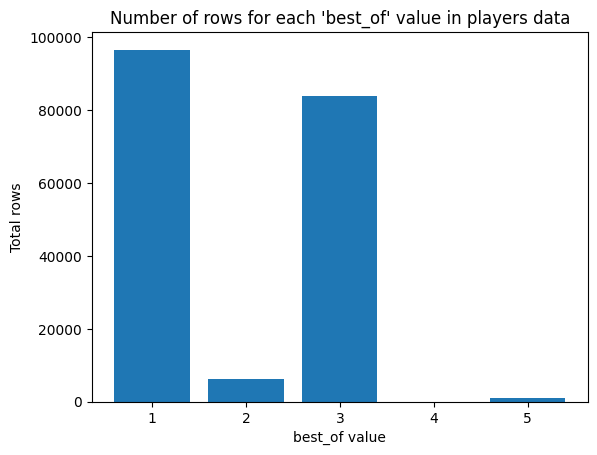

In [23]:
xValues = []
yValues = []
for i in range(1,6):
    xValues.append(str(i))
    yValues.append(playersData[playersData["best_of"] == i].shape[0])
plt.bar(xValues, yValues)
plt.title("Number of rows for each 'best_of' value in players data")
plt.ylabel('Total rows')
plt.xlabel('best_of value')
plt.show()

In [24]:
bestOf3_playersData = playersData[playersData["best_of"] == 3]
bestOf1_playersData = playersData[playersData["best_of"] == 1]

In [25]:
deleteColumns = []
for column in bestOf1_playersData.columns:
    if (("m2_" in column) or ("m3_" in column) or ("map_2" in column) or ("map_3" in column)):
        deleteColumns.append(column)
        
bestOf1_playersData = bestOf1_playersData.drop(columns=deleteColumns)

In [26]:
bestOf1_playersData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96624 entries, 60 to 367020
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              96624 non-null  object 
 1   player_name       96624 non-null  object 
 2   team              96624 non-null  object 
 3   opponent          96624 non-null  object 
 4   country           96624 non-null  object 
 5   player_id         96624 non-null  int64  
 6   match_id          96624 non-null  int64  
 7   event_id          96624 non-null  int64  
 8   event_name        96624 non-null  object 
 9   best_of           96624 non-null  int64  
 10  map_1             96624 non-null  object 
 11  kills             96624 non-null  int64  
 12  assists           96624 non-null  int64  
 13  deaths            96624 non-null  int64  
 14  hs                96624 non-null  int64  
 15  flash_assists     96624 non-null  float64
 16  kast              96624 non-null  floa

In [27]:
bestOf1_resultsData = resultsData[resultsData["match_id"].isin(bestOf1_playersData["match_id"])]
bestOf1_economyData = economyData[economyData["match_id"].isin(bestOf1_playersData["match_id"])]
bestOf1_picksData = picksData[picksData["match_id"].isin(bestOf1_playersData["match_id"])]

In [28]:
bestOf3_playersData.iloc[:, 1:].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84013 entries, 0 to 367771
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_name       84013 non-null  object 
 1   team              84013 non-null  object 
 2   opponent          84013 non-null  object 
 3   country           84013 non-null  object 
 4   player_id         84013 non-null  int64  
 5   match_id          84013 non-null  int64  
 6   event_id          84013 non-null  int64  
 7   event_name        84013 non-null  object 
 8   best_of           84013 non-null  int64  
 9   map_1             84013 non-null  object 
 10  map_2             83974 non-null  object 
 11  map_3             32831 non-null  object 
 12  kills             84013 non-null  int64  
 13  assists           84013 non-null  int64  
 14  deaths            84013 non-null  int64  
 15  hs                84013 non-null  int64  
 16  flash_assists     84013 non-null  floa

In [29]:
# Removing Nan values from "map_2" column in bestOf3_playersData
bestOf3_playersData = bestOf3_playersData[bestOf3_playersData["map_2"] == bestOf3_playersData["map_2"]]

In [30]:
# Removing Nan values from "m2_flash_assists" column in bestOf3_playersData
bestOf3_playersData = bestOf3_playersData[bestOf3_playersData["m2_flash_assists"] == bestOf3_playersData["m2_flash_assists"]]

In [31]:
# Removing Nan values from "m2_kast_ct" column in bestOf3_playersData
bestOf3_playersData = bestOf3_playersData[bestOf3_playersData["m2_kast_ct"] == bestOf3_playersData["m2_kast_ct"]]

In [32]:
# Removing Nan values from "m2_kast_t" column in bestOf3_playersData
bestOf3_playersData = bestOf3_playersData[bestOf3_playersData["m2_kast_t"] == bestOf3_playersData["m2_kast_t"]]

In [33]:
bestOf3_playersData.iloc[:, 1:].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78743 entries, 0 to 366850
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_name       78743 non-null  object 
 1   team              78743 non-null  object 
 2   opponent          78743 non-null  object 
 3   country           78743 non-null  object 
 4   player_id         78743 non-null  int64  
 5   match_id          78743 non-null  int64  
 6   event_id          78743 non-null  int64  
 7   event_name        78743 non-null  object 
 8   best_of           78743 non-null  int64  
 9   map_1             78743 non-null  object 
 10  map_2             78743 non-null  object 
 11  map_3             30860 non-null  object 
 12  kills             78743 non-null  int64  
 13  assists           78743 non-null  int64  
 14  deaths            78743 non-null  int64  
 15  hs                78743 non-null  int64  
 16  flash_assists     78743 non-null  floa

In [34]:
bestOf3_resultsData = resultsData[resultsData["match_id"].isin(bestOf3_playersData["match_id"])]
bestOf3_economyData = economyData[economyData["match_id"].isin(bestOf3_playersData["match_id"])]
bestOf3_picksData = picksData[picksData["match_id"].isin(bestOf3_playersData["match_id"])]

## Exploratory Data Analysis

In [35]:
tempResultsData = resultsData.drop_duplicates(subset=['match_id'])

In [36]:
winnerTeams = {}
for index, row in tempResultsData.iterrows():
    if row["match_winner"] == 1:
        if row["team_1"] not in winnerTeams:
            winnerTeams[row["team_1"]] = 1
        else:
            winnerTeams[row["team_1"]] += 1
    elif row["match_winner"] == 2:
        if row["team_2"] not in winnerTeams:
            winnerTeams[row["team_2"]] = 1
        else:
            winnerTeams[row["team_2"]] += 1
        

In [37]:
sortedTeams = sorted(winnerTeams.items(), key=lambda item: item[1], reverse=True)

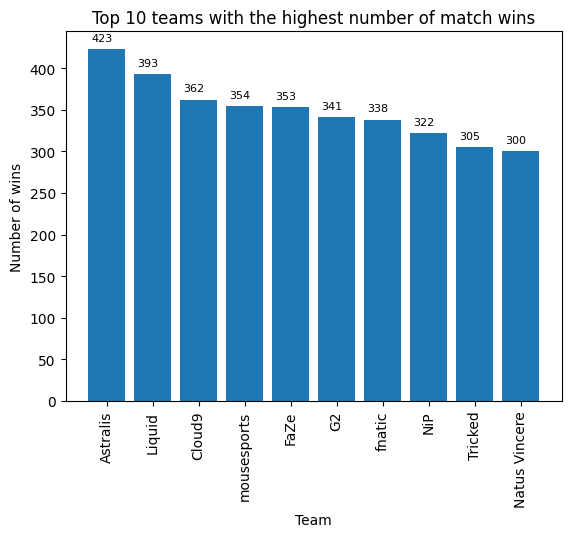

In [38]:
xValue = []
yValue = []

for i in sortedTeams[:10]:
    xValue.append(i[0])
    yValue.append(i[1])
    
pl = plt.bar(xValue, yValue)
plt.title("Top 10 teams with the highest number of match wins")
plt.ylabel('Number of wins')
plt.xlabel('Team')
plt.xticks(rotation=90)

for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.07, bar.get_height()+10), 
                     fontsize=8)

plt.show()

In [39]:
tempEconomyData = economyData[economyData["17_winner"] != economyData["17_winner"]]

In [40]:
winnerTeams = {}
for index, row in tempEconomyData.iterrows():
    if row["16_winner"] == 1:
        if row["team_1"] not in winnerTeams:
            winnerTeams[row["team_1"]] = 1
        else:
            winnerTeams[row["team_1"]] += 1
    elif row["16_winner"] == 2:
        if row["team_2"] not in winnerTeams:
            winnerTeams[row["team_2"]] = 1
        else:
            winnerTeams[row["team_2"]] += 1

In [41]:
sortedTeams = sorted(winnerTeams.items(), key=lambda item: item[1], reverse=True)

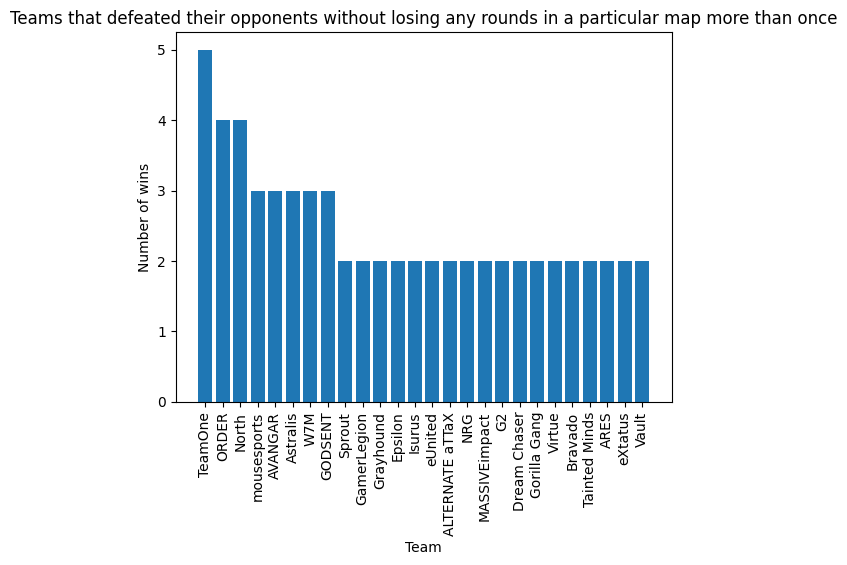

In [42]:
xValue = []
yValue = []

for i in sortedTeams:
    if i[1]>1:
        xValue.append(i[0])
        yValue.append(i[1])
    
pl = plt.bar(xValue, yValue)
plt.title("Teams that defeated their opponents without losing any rounds in a particular map more than once")
plt.ylabel('Number of wins')
plt.xlabel('Team')
plt.xticks(rotation=90)

plt.show()

In [43]:
losingTeams = {}
for index, row in tempResultsData.iterrows():
    if row["match_winner"] == 2:
        if row["team_1"] not in losingTeams:
            losingTeams[row["team_1"]] = 1
        else:
            losingTeams[row["team_1"]] += 1
    elif row["match_winner"] == 1:
        if row["team_2"] not in losingTeams:
            losingTeams[row["team_2"]] = 1
        else:
            losingTeams[row["team_2"]] += 1
        

In [44]:
sortedTeams = sorted(losingTeams.items(), key=lambda item: item[1], reverse=True)

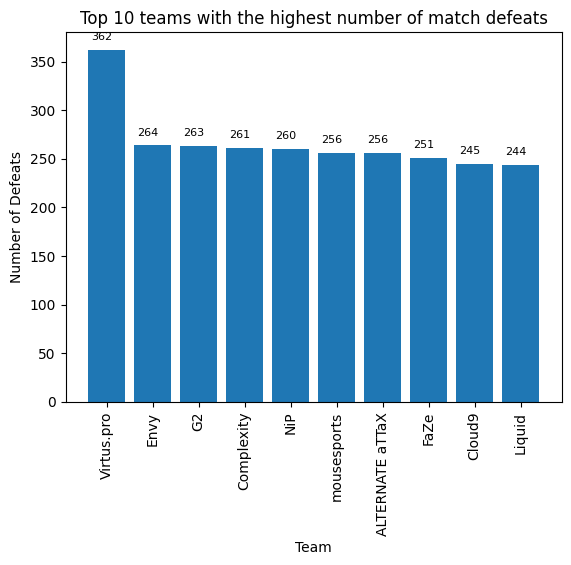

In [45]:
xValue = []
yValue = []

for i in sortedTeams[:10]:
    xValue.append(i[0])
    yValue.append(i[1])
    
pl = plt.bar(xValue, yValue)
plt.title("Top 10 teams with the highest number of match defeats")
plt.ylabel('Number of Defeats')
plt.xlabel('Team')
plt.xticks(rotation=90)

for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.07, bar.get_height()+10), 
                     fontsize=8)

plt.show()

In [46]:
matchID = {}

for index, row in resultsData.iterrows():
    
    if (row['match_id'] not in matchID):
        if(row["match_winner"] == 1):
            matchID[row['match_id']] = row['team_1']
        elif(row['match_winner'] == 2):
            matchID[row['match_id']] = row['team_2']
    else:
        if(row["match_winner"] == 1):
            matchID[row['match_id']] = row['team_1']
        elif(row['match_winner'] == 2):
            matchID[row['match_id']] = row['team_2']

In [47]:
wins = []

for index, row in playersData.iterrows():
    if (matchID[row['match_id']] == row['team']):
        wins.append(1)
    elif (matchID[row['match_id']] == row['opponent']):
        wins.append(0)

In [48]:
numWins = {}
for i in wins:
    if (i not in numWins):
        numWins[i] = 1
    else:
        numWins[i] += 1
        
print("Distribution of win-loss ratio in the data:-")
print(numWins)

Distribution of win-loss ratio in the data:-
{0: 93336, 1: 94353}


In [49]:
tempPlayersData = playersData
deleteColumns = []
for column in tempPlayersData.columns:
    if (("m2_" in column) or ("m3_" in column) or ("m1_" in column)):
        deleteColumns.append(column)
        
tempPlayersData = tempPlayersData.drop(columns=deleteColumns)

In [50]:
deleteColumns = ['player_name', 'player_id', 'match_id', 'event_id', 'event_name', 'team', 'date', 'opponent', 'country']
tempPlayersData = tempPlayersData.drop(columns=deleteColumns)

In [51]:
tempPlayersData["Match Result"] = wins
playersData["Match Result"] = wins

In [52]:
tempPlayersData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187689 entries, 0 to 367771
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   best_of        187689 non-null  int64  
 1   map_1          187689 non-null  object 
 2   map_2          90636 non-null   object 
 3   map_3          33668 non-null   object 
 4   kills          187689 non-null  int64  
 5   assists        187689 non-null  int64  
 6   deaths         187689 non-null  int64  
 7   hs             187689 non-null  int64  
 8   flash_assists  187689 non-null  float64
 9   kast           187689 non-null  float64
 10  kddiff         187689 non-null  int64  
 11  adr            187689 non-null  float64
 12  fkdiff         187689 non-null  int64  
 13  rating         187689 non-null  float64
 14  kills_ct       187689 non-null  float64
 15  deaths_ct      187689 non-null  float64
 16  kddiff_ct      187689 non-null  float64
 17  adr_ct         187689 non-nul

# Calculating the correlation between the features and the Match Result

In [53]:
tempPlayersData.corr()

C:\Users\ROG\AppData\Local\Temp\ipykernel_14556\3660243741.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tempPlayersData.corr()


,best_of,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,Match Result
best_of,1.000000,0.755818,0.637687,0.803495,0.669807,0.365073,-0.000714,-0.001775,-0.010549,-0.000758,-0.020491,0.686293,0.739942,0.109996,-0.001154,0.015091,-0.005556,0.671854,0.751118,-0.114074,-0.022768,-0.023504,-0.034673,-0.000892
kills,0.755818,1.000000,0.683720,0.809099,0.864506,0.371070,0.233250,0.394738,0.338697,0.218070,0.326128,0.909071,0.755713,0.406587,0.248216,0.184037,0.253058,0.887742,0.746827,0.171424,0.228714,0.148692,0.216530,0.156953
assists,0.637687,0.683720,1.000000,0.700331,0.600843,0.650963,0.175583,0.039855,0.148355,0.028460,0.105654,0.628733,0.660715,0.120727,0.125049,0.141326,0.087393,0.599031,0.640508,-0.063422,0.078143,0.107739,0.059131,0.138939
deaths,0.803495,0.809099,0.700331,1.000000,0.725892,0.352785,-0.170342,-0.220568,-0.100578,-0.103425,-0.200211,0.727691,0.919779,-0.040542,-0.056374,-0.113863,-0.138919,0.726931,0.935824,-0.284904,-0.098268,-0.145108,-0.169711,-0.174817
hs,0.669807,0.864506,0.600843,0.725892,1.000000,0.275043,0.193248,0.299945,0.322328,0.129487,0.268959,0.759316,0.672354,0.291792,0.216806,0.145497,0.185250,0.796827,0.675091,0.147642,0.242860,0.133401,0.203814,0.120527
flash_assists,0.365073,0.371070,0.650963,0.352785,0.275043,1.000000,0.084948,0.064312,-0.010135,0.049713,0.045895,0.343539,0.327612,0.104794,0.006842,0.063443,0.043951,0.322553,0.327335,-0.011133,-0.027244,0.056533,0.017783,0.104033
kast,-0.000714,0.233250,0.175583,-0.170342,0.193248,0.084948,1.000000,0.653450,0.589860,0.386616,0.794805,0.221969,-0.129687,0.464541,0.386950,0.716474,0.564956,0.196096,-0.183651,0.495060,0.453326,0.746179,0.608799,0.571874
kddiff,-0.001775,0.394738,0.039855,-0.220568,0.299945,0.064312,0.653450,1.000000,0.719391,0.523634,0.854300,0.371098,-0.183753,0.738206,0.500108,0.483468,0.637197,0.336886,-0.223586,0.729948,0.533238,0.473655,0.624713,0.533814
adr,-0.010549,0.338697,0.148355,-0.100578,0.322328,-0.010135,0.589860,0.719391,1.000000,0.425692,0.877305,0.314242,-0.059673,0.513591,0.721373,0.421570,0.647274,0.293669,-0.123616,0.542817,0.717163,0.440860,0.650361,0.365723
fkdiff,-0.000758,0.218070,0.028460,-0.103425,0.129487,0.049713,0.386616,0.523634,0.425692,1.000000,0.524252,0.213796,-0.074268,0.388563,0.306758,0.288868,0.396812,0.176404,-0.115523,0.380185,0.303756,0.276385,0.376589,0.274702


C:\Users\ROG\AppData\Local\Temp\ipykernel_14556\4015012130.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = tempPlayersData.corr()


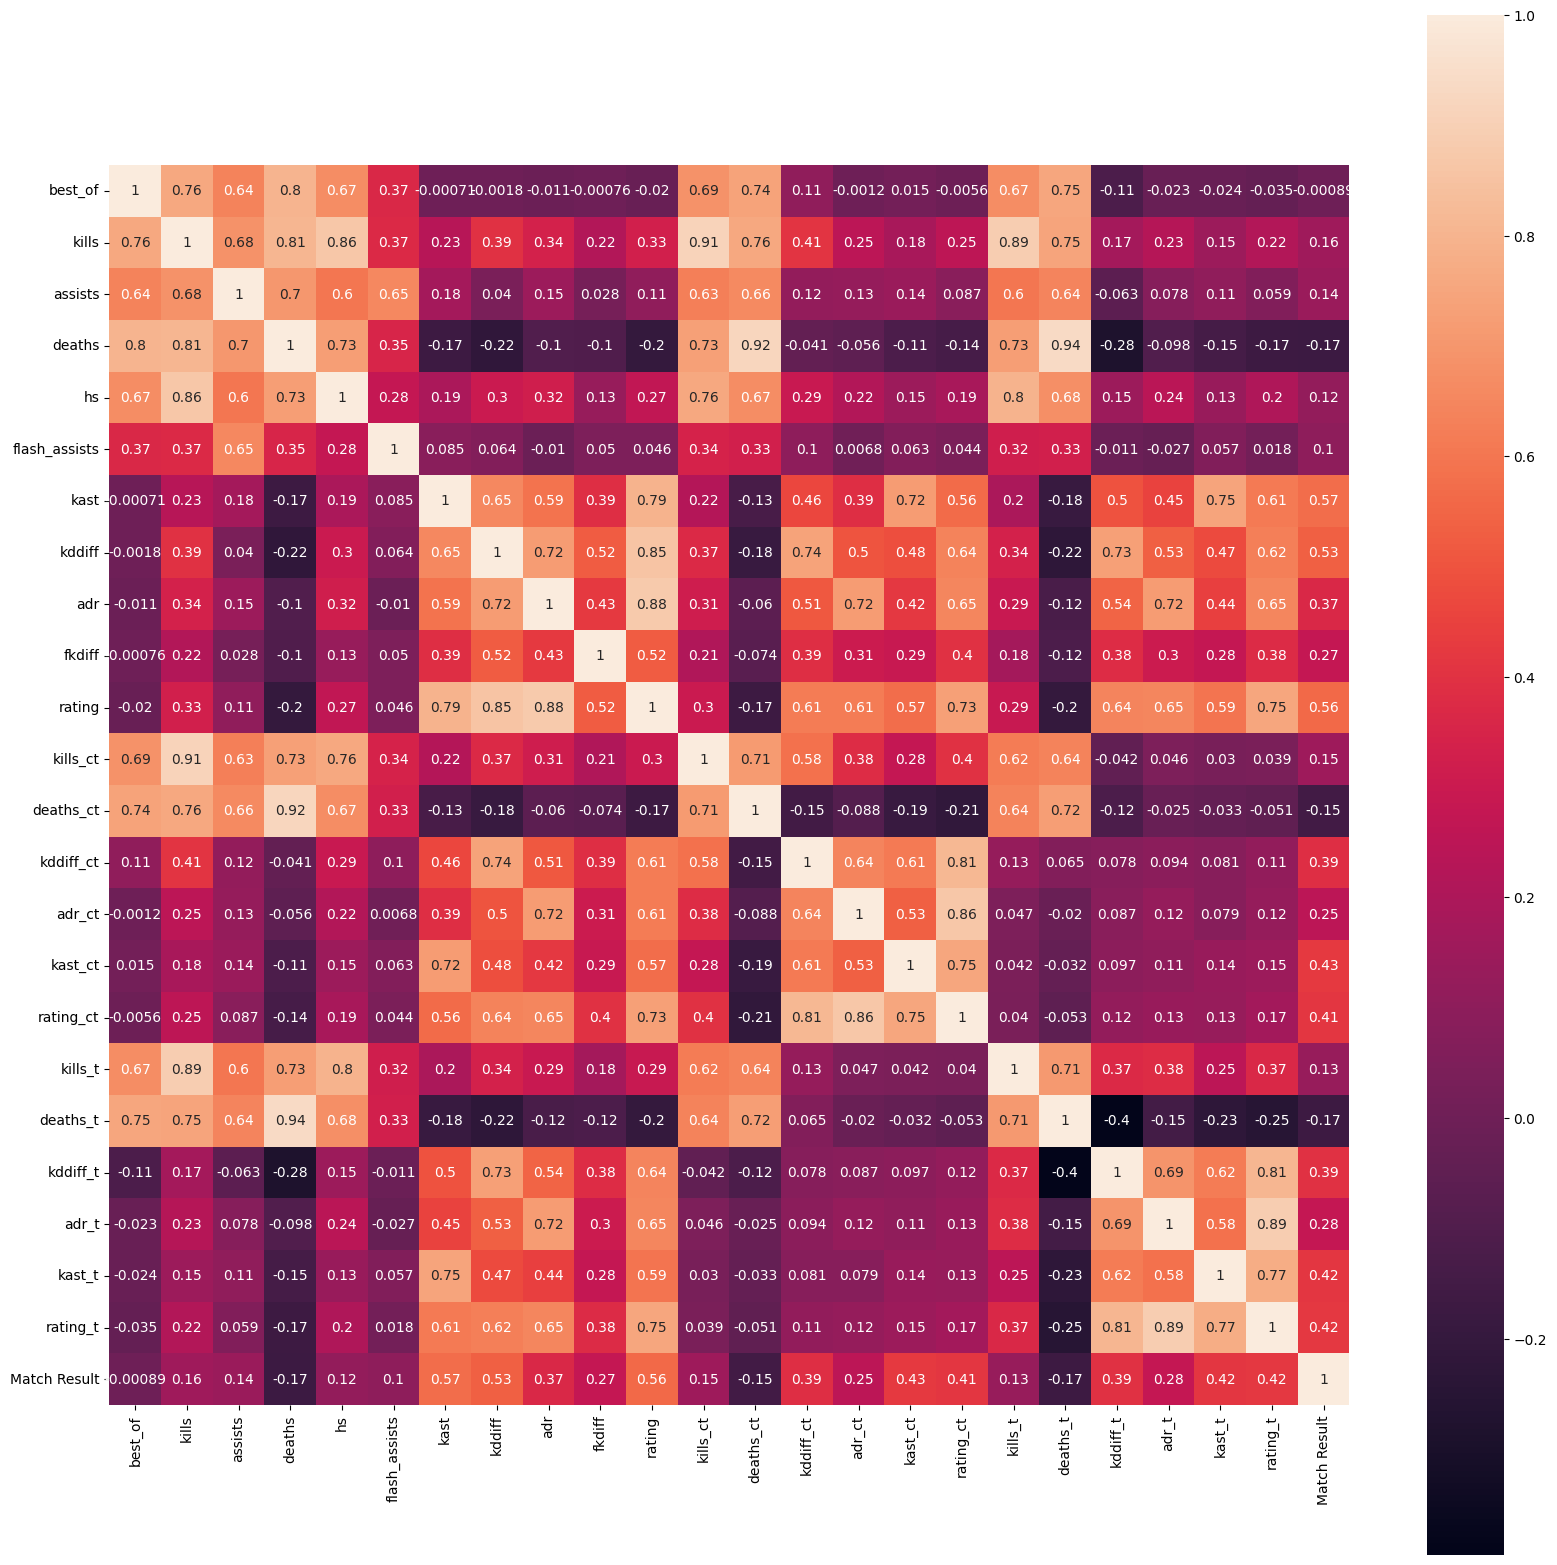

In [54]:
# Creating a heatmap between the variables to check the correlation
corr = tempPlayersData.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, square=True)
plt.show()

# Visualising the relation between each feature and the Match Result

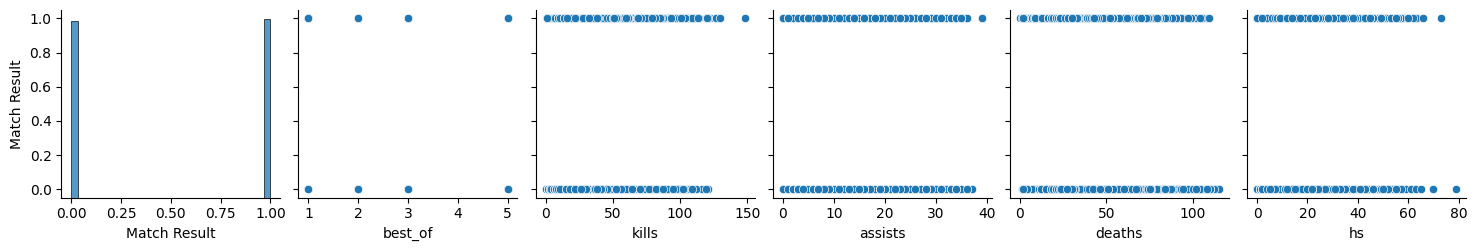

In [55]:
sns.pairplot(
    playersData, 
    y_vars=["Match Result"],
    x_vars=['Match Result', 'best_of', 'kills', 'assists', 'deaths', 'hs'],
)

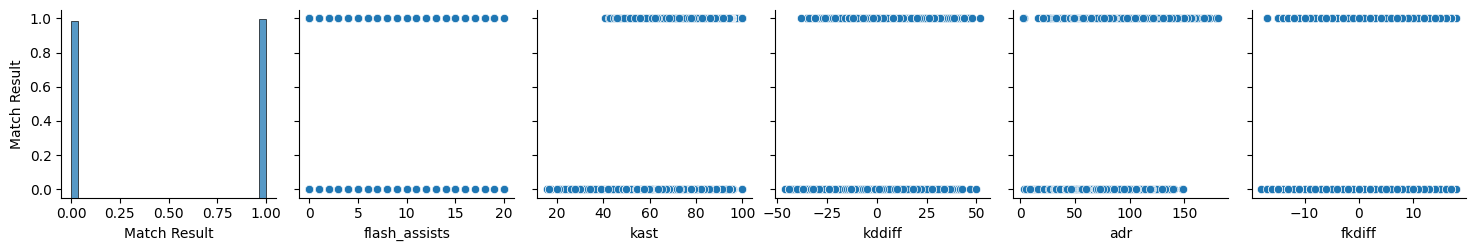

In [56]:
sns.pairplot(
    playersData, 
    y_vars=["Match Result"],
    x_vars=['Match Result', 'flash_assists', 'kast', 'kddiff', 'adr', 'fkdiff'],
)

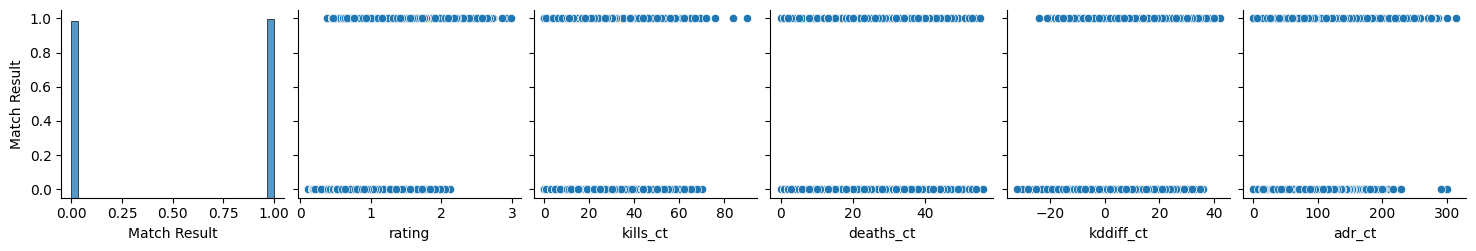

In [57]:
sns.pairplot(
    playersData, 
    y_vars=["Match Result"],
    x_vars=['Match Result', 'rating', 'kills_ct', 'deaths_ct', 'kddiff_ct', 'adr_ct'],
)

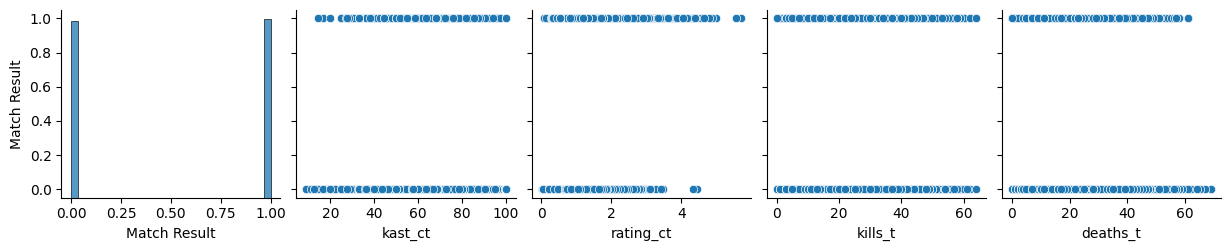

In [58]:
sns.pairplot(
    playersData, 
    y_vars=["Match Result"],
    x_vars=['Match Result', 'kast_ct', 'rating_ct', 'kills_t', 'deaths_t'],
)

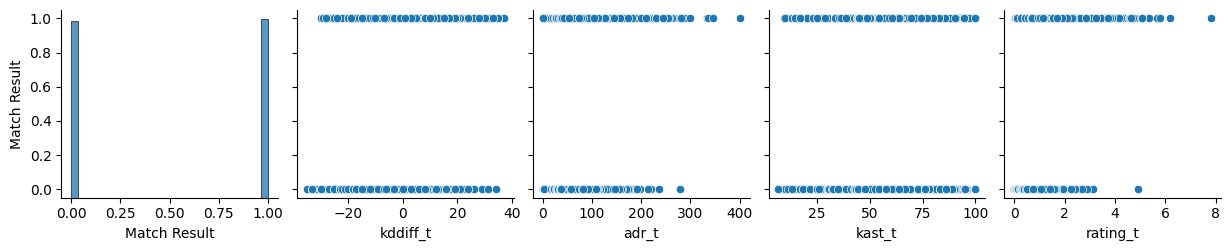

In [59]:
sns.pairplot(
    playersData, 
    y_vars=["Match Result"],
    x_vars=['Match Result', 'kddiff_t', 'adr_t', 'kast_t', 'rating_t'],
)

# Calculating the correlation for the Top 10 teams with the most wins

In [60]:
winnerTeams = {}
for index, row in tempResultsData.iterrows():
    if row["match_winner"] == 1:
        if row["team_1"] not in winnerTeams:
            winnerTeams[row["team_1"]] = 1
        else:
            winnerTeams[row["team_1"]] += 1
    elif row["match_winner"] == 2:
        if row["team_2"] not in winnerTeams:
            winnerTeams[row["team_2"]] = 1
        else:
            winnerTeams[row["team_2"]] += 1

In [61]:
sortedTeams = sorted(winnerTeams.items(), key=lambda item: item[1], reverse=True)

In [62]:
tempTeams = []
for i in sortedTeams[:10]:
    tempTeams.append(i[0])

In [63]:
tempWinnerPlayers = playersData[playersData['team'].isin(tempTeams)]

In [64]:
winnerPlayers = tempWinnerPlayers
deleteColumns = []
for column in tempWinnerPlayers.columns:
    if (("m2_" in column) or ("m3_" in column) or ("m1_" in column)):
        deleteColumns.append(column)
        
tempWinnerPlayers = tempWinnerPlayers.drop(columns=deleteColumns)

In [65]:
deleteColumns = ['player_name', 'player_id', 'match_id', 'event_id', 'event_name', 'team', 'date', 'opponent', 'country']
tempWinnerPlayers = tempWinnerPlayers.drop(columns=deleteColumns)

C:\Users\ROG\AppData\Local\Temp\ipykernel_14556\1825776966.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = tempWinnerPlayers.corr()


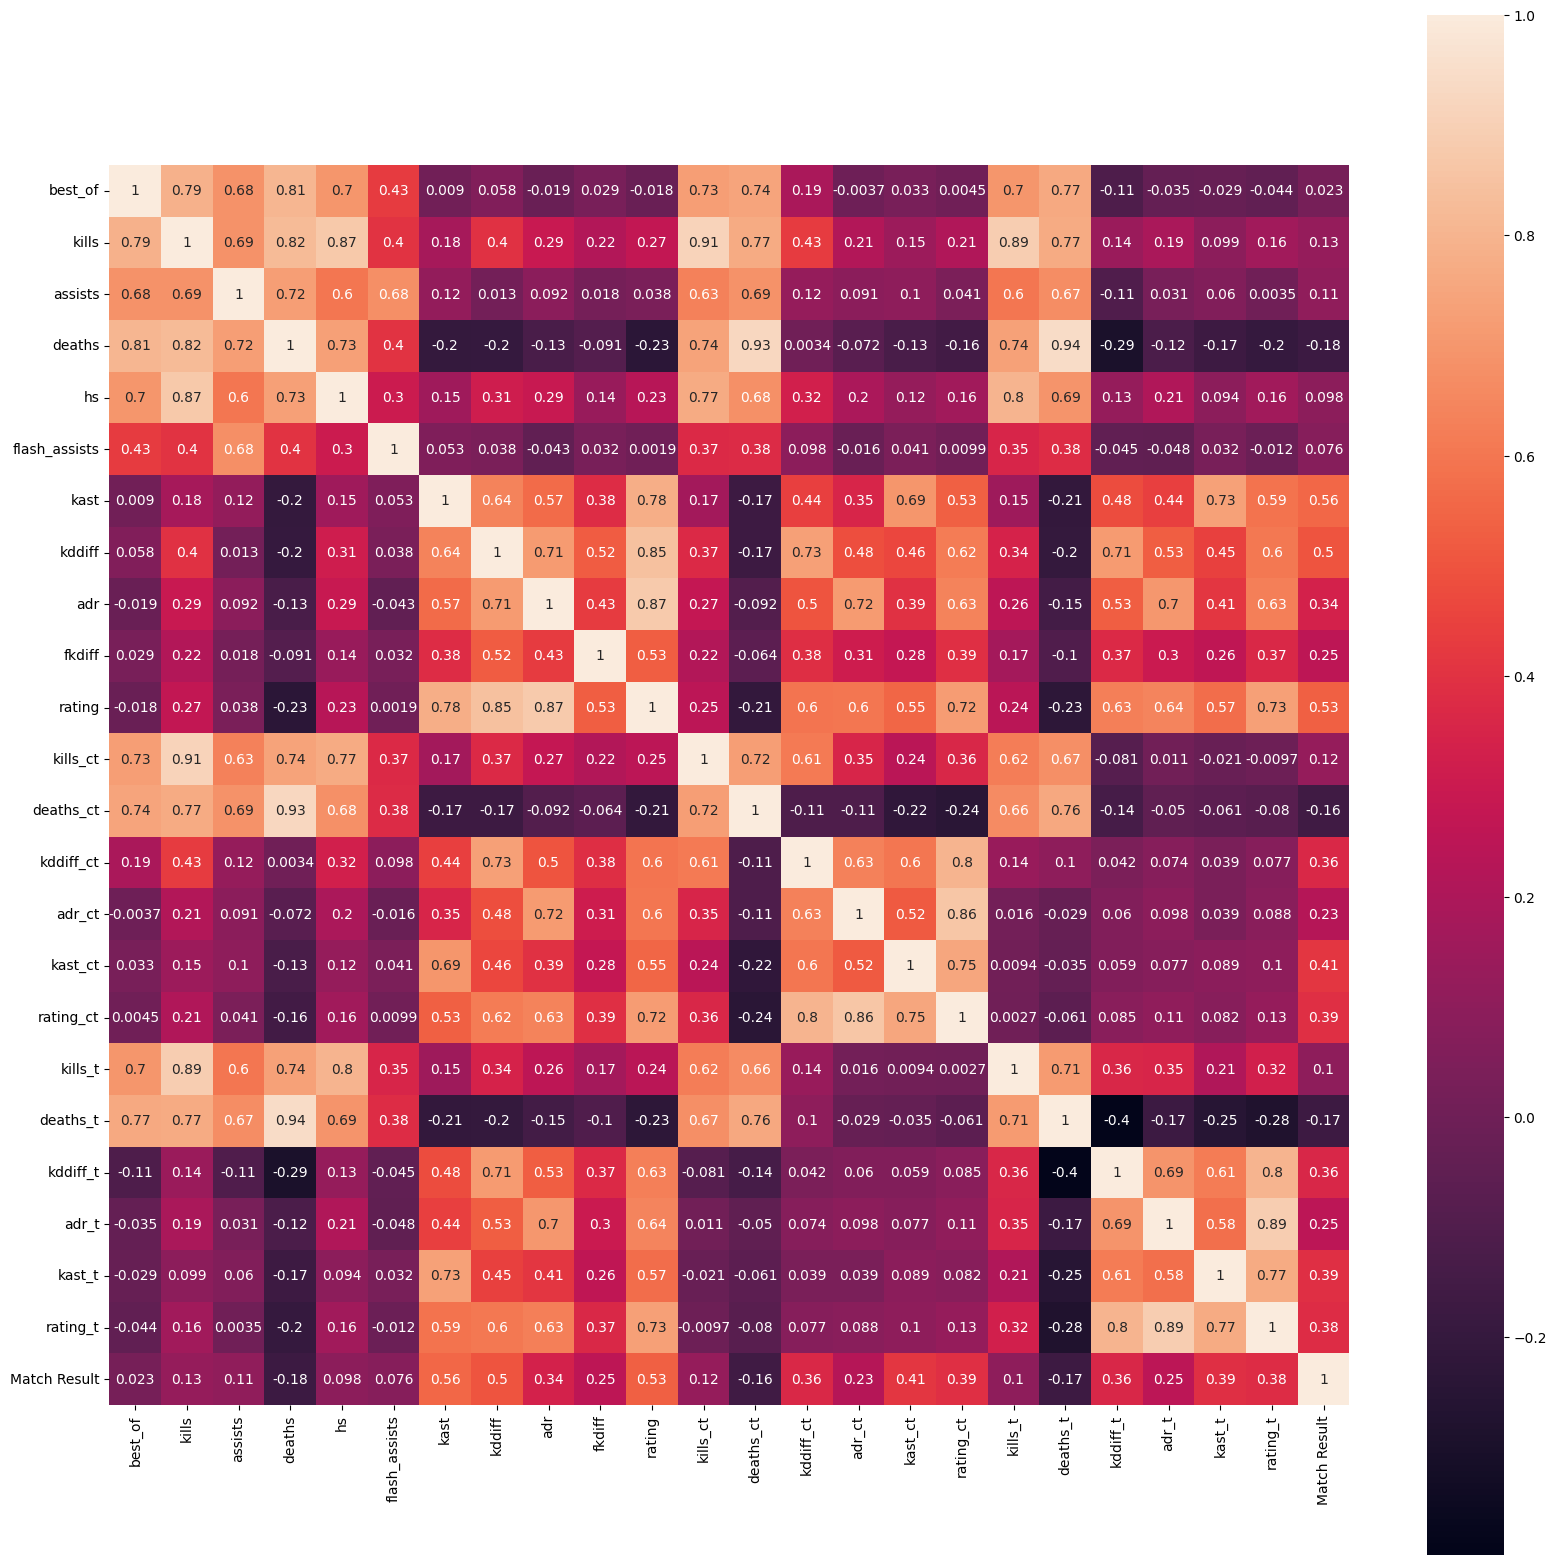

In [66]:
# Creating a heatmap between the variables to check the correlation
corr = tempWinnerPlayers.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, square=True)
plt.show()

# Visualising the relation between each feature and Match Result for the Top 10 teams with the most wins

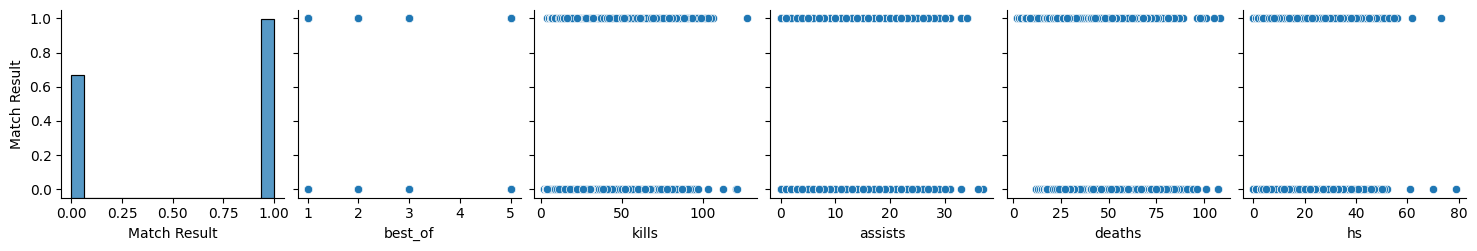

In [67]:
sns.pairplot(
    winnerPlayers, 
    y_vars=["Match Result"],
    x_vars=['Match Result', 'best_of', 'kills', 'assists', 'deaths', 'hs'],
)

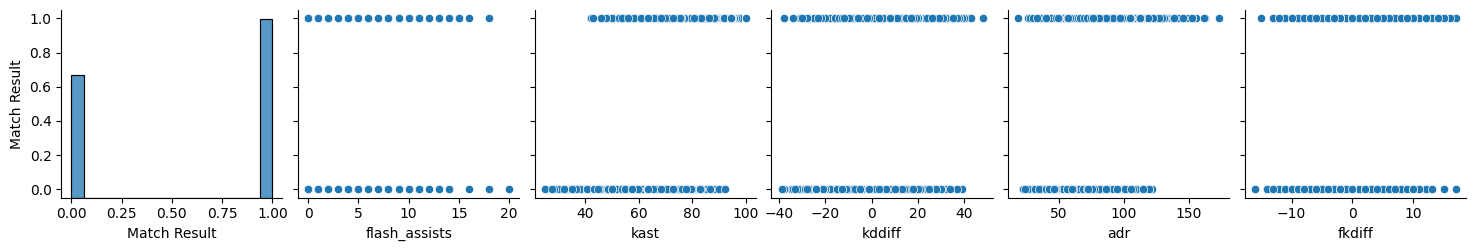

In [68]:
sns.pairplot(
    winnerPlayers, 
    y_vars=["Match Result"],
    x_vars=['Match Result', 'flash_assists', 'kast', 'kddiff', 'adr', 'fkdiff'],
)

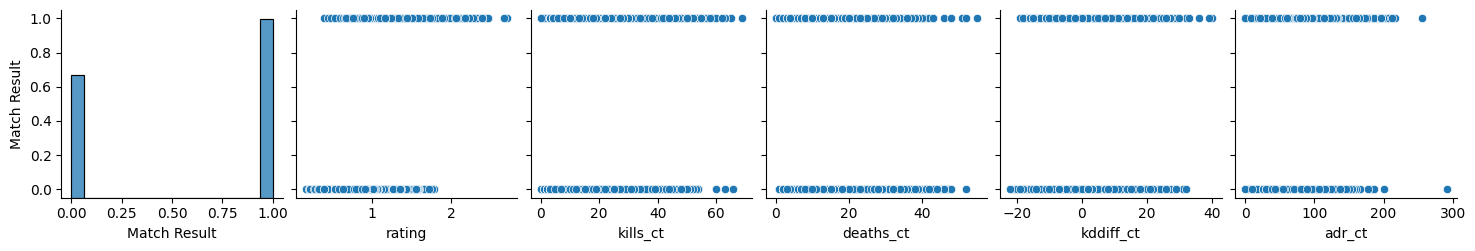

In [69]:
sns.pairplot(
    winnerPlayers, 
    y_vars=["Match Result"],
    x_vars=['Match Result', 'rating', 'kills_ct', 'deaths_ct', 'kddiff_ct', 'adr_ct'],
)

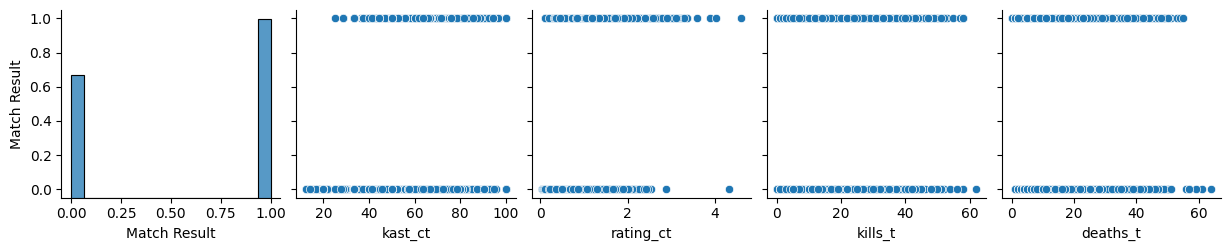

In [70]:
sns.pairplot(
    winnerPlayers, 
    y_vars=["Match Result"],
    x_vars=['Match Result', 'kast_ct', 'rating_ct', 'kills_t', 'deaths_t'],
)

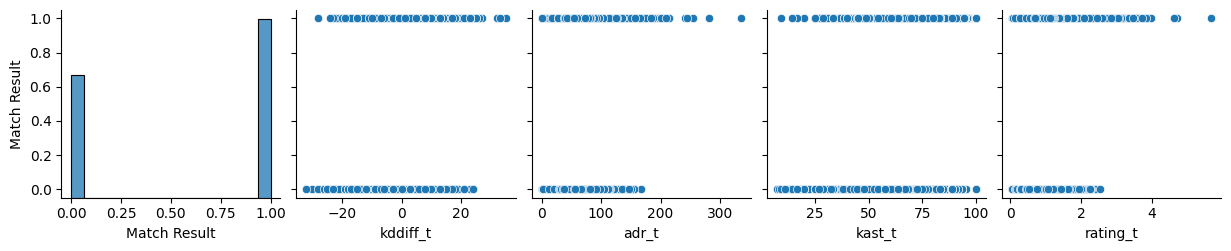

In [71]:
sns.pairplot(
    winnerPlayers, 
    y_vars=["Match Result"],
    x_vars=['Match Result', 'kddiff_t', 'adr_t', 'kast_t', 'rating_t'],
)

# Calculating the correlation for the Top 10 teams with the most defeats

In [72]:
losingTeams = {}
for index, row in tempResultsData.iterrows():
    if row["match_winner"] == 2:
        if row["team_1"] not in losingTeams:
            losingTeams[row["team_1"]] = 1
        else:
            losingTeams[row["team_1"]] += 1
    elif row["match_winner"] == 1:
        if row["team_2"] not in losingTeams:
            losingTeams[row["team_2"]] = 1
        else:
            losingTeams[row["team_2"]] += 1
        

In [73]:
sortedTeams = sorted(losingTeams.items(), key=lambda item: item[1], reverse=True)

In [74]:
tempTeams = []
for i in sortedTeams[:10]:
    tempTeams.append(i[0])

In [75]:
tempLosingPlayers = playersData[playersData['team'].isin(tempTeams)]

In [76]:
losingPlayers = tempLosingPlayers
deleteColumns = []
for column in tempLosingPlayers.columns:
    if (("m2_" in column) or ("m3_" in column) or ("m1_" in column)):
        deleteColumns.append(column)
        
tempLosingPlayers = tempLosingPlayers.drop(columns=deleteColumns)

In [77]:
deleteColumns = ['player_name', 'player_id', 'match_id', 'event_id', 'event_name', 'team', 'date', 'opponent', 'country']
tempLosingPlayers = tempLosingPlayers.drop(columns=deleteColumns)

C:\Users\ROG\AppData\Local\Temp\ipykernel_14556\593156028.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = tempLosingPlayers.corr()


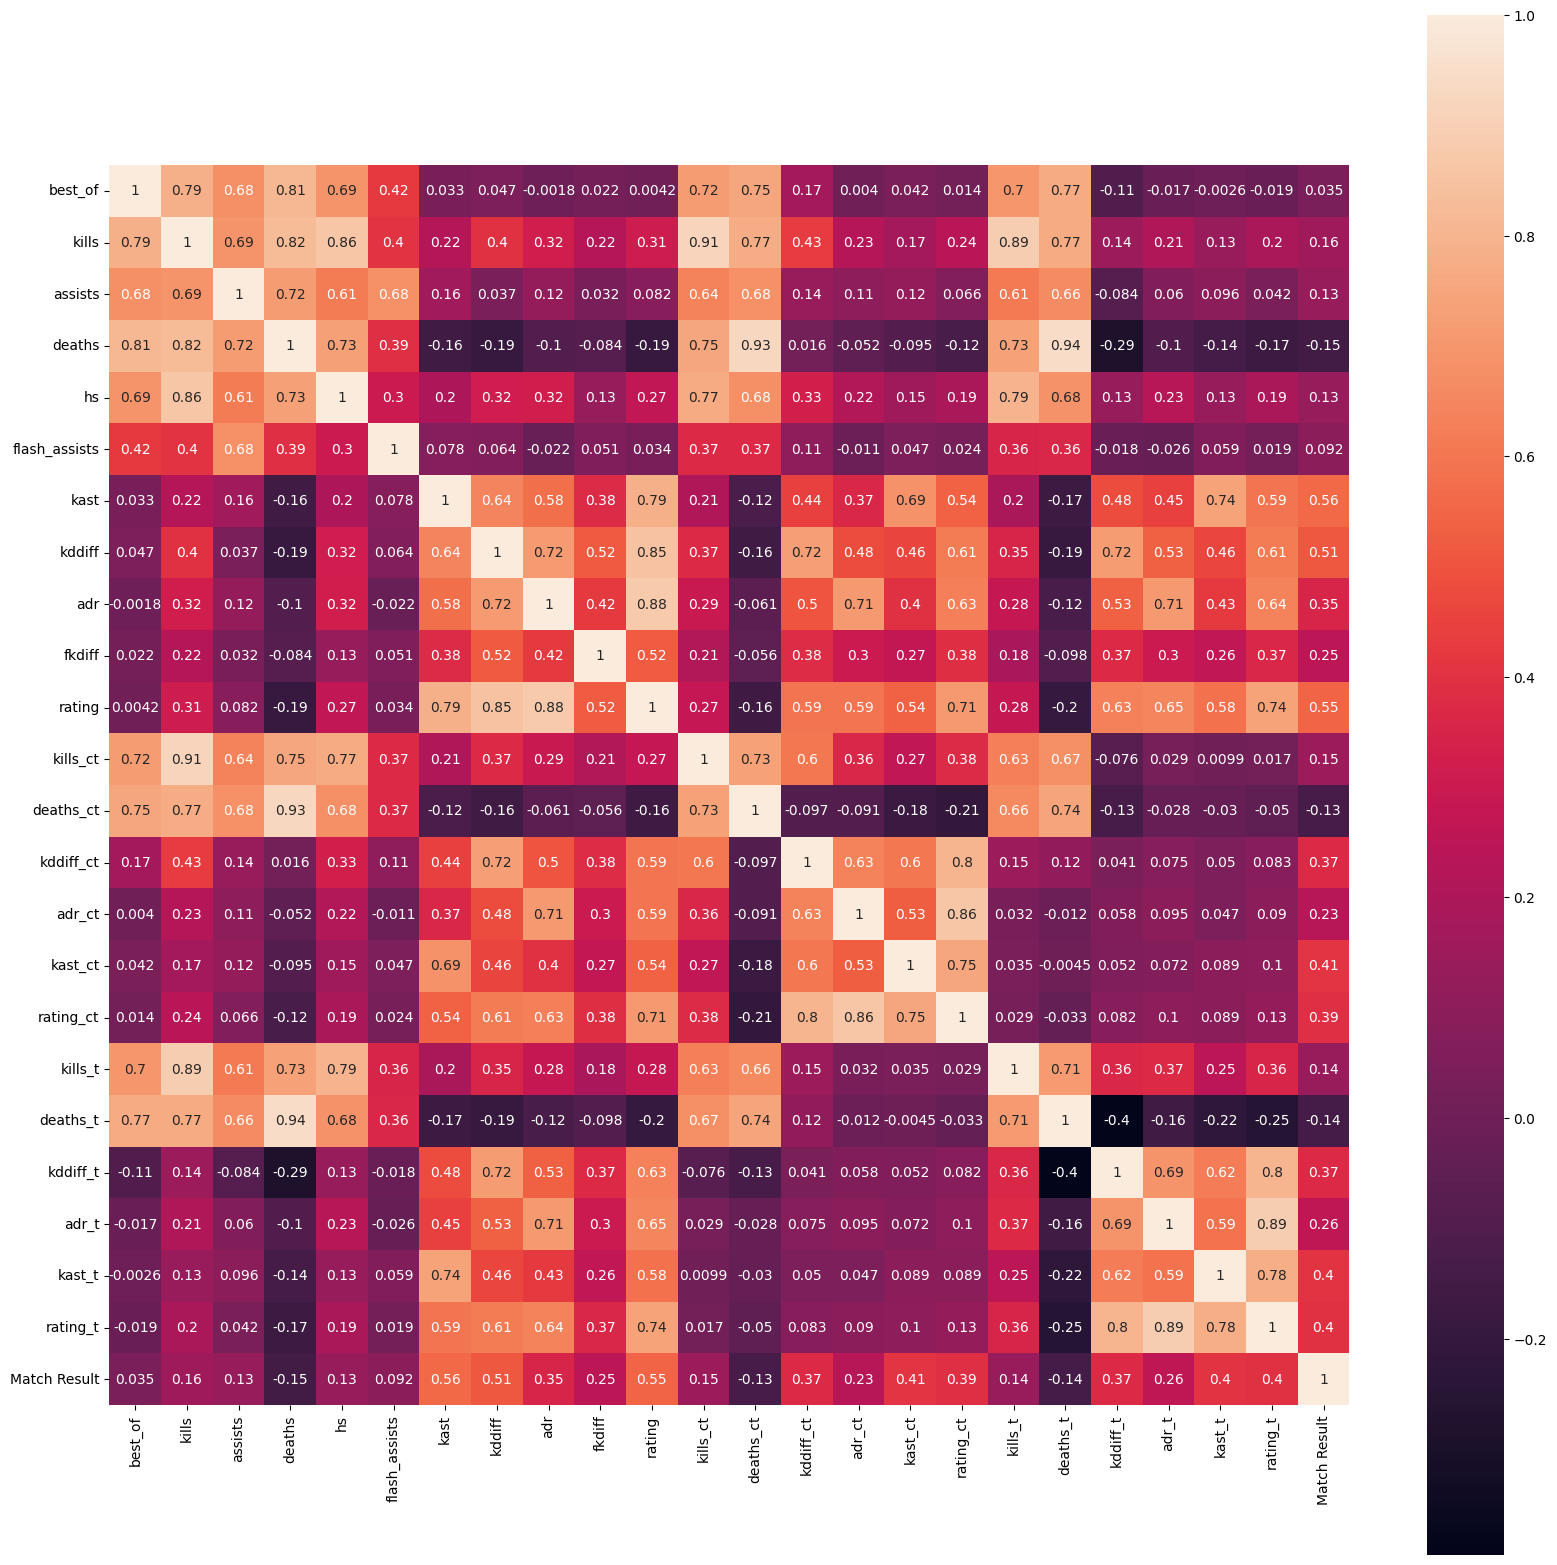

In [78]:
# Creating a heatmap between the variables to check the correlation
corr = tempLosingPlayers.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, square=True)
plt.show()

# Visualising the relation between each feature and the Match Result for the Top 10 teams with the most defeats

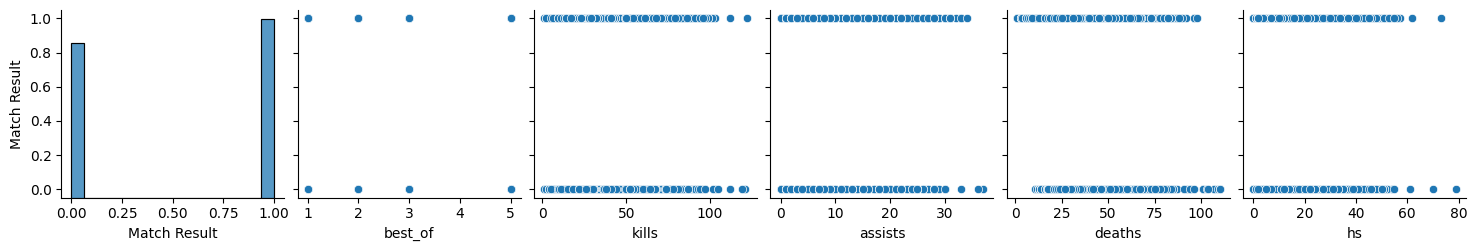

In [79]:
sns.pairplot(
    losingPlayers, 
    y_vars=["Match Result"],
    x_vars=['Match Result', 'best_of', 'kills', 'assists', 'deaths', 'hs'],
)

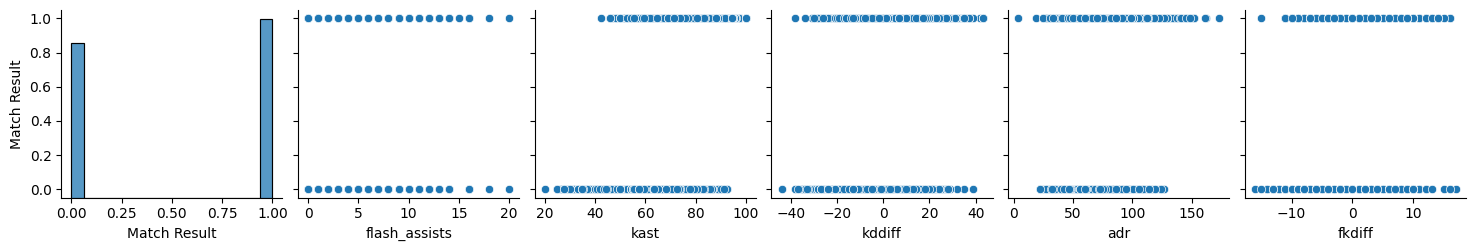

In [80]:
sns.pairplot(
    losingPlayers, 
    y_vars=["Match Result"],
    x_vars=['Match Result', 'flash_assists', 'kast', 'kddiff', 'adr', 'fkdiff'],
)

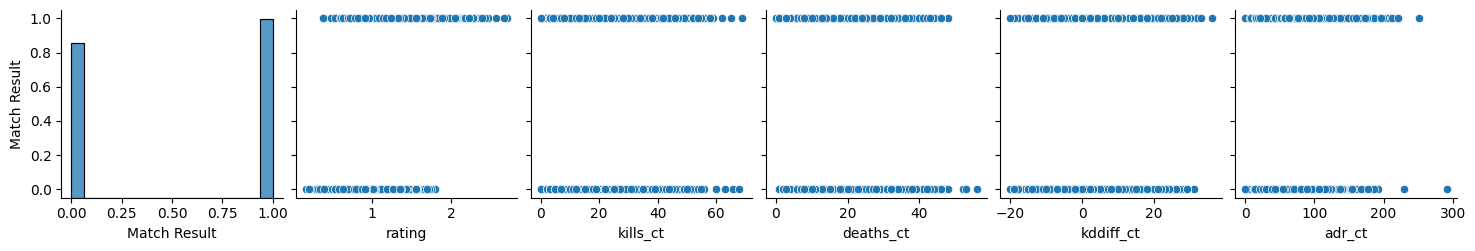

In [81]:
sns.pairplot(
    losingPlayers, 
    y_vars=["Match Result"],
    x_vars=['Match Result', 'rating', 'kills_ct', 'deaths_ct', 'kddiff_ct', 'adr_ct'],
)

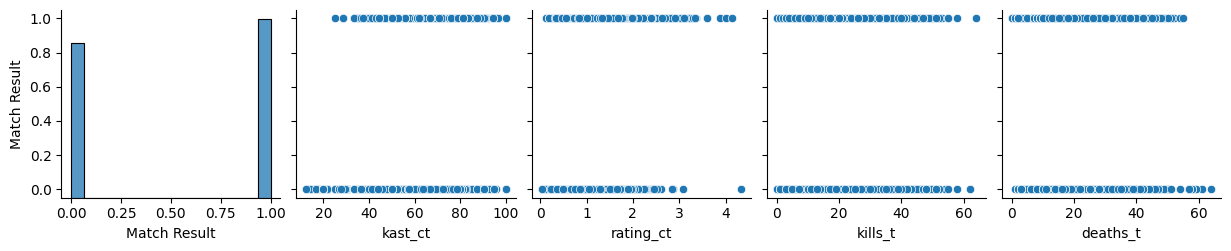

In [82]:
sns.pairplot(
    losingPlayers, 
    y_vars=["Match Result"],
    x_vars=['Match Result', 'kast_ct', 'rating_ct', 'kills_t', 'deaths_t'],
)

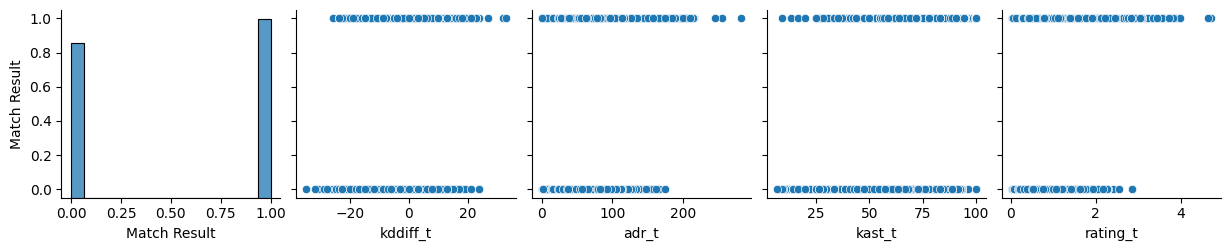

In [83]:
sns.pairplot(
    losingPlayers, 
    y_vars=["Match Result"],
    x_vars=['Match Result', 'kddiff_t', 'adr_t', 'kast_t', 'rating_t'],
)

In [84]:
features = {}
for col in tempPlayersData.describe().columns:
    corr = tempPlayersData["Match Result"].corr(tempPlayersData[col])
    features[col] = corr

In [85]:
featuresTable = OrderedDict(sorted(features.items(), key=lambda x:x[1], reverse=True))

In [86]:
featuresTable = pd.DataFrame(featuresTable.items(), columns=["Feature Name", "Correlation"])
featuresTable

,Feature Name,Correlation
0,Match Result,1.000000
1,kast,0.571874
2,rating,0.562484
3,kddiff,0.533814
4,kast_ct,0.425730
5,rating_t,0.421035
6,kast_t,0.416039
7,rating_ct,0.412927
8,kddiff_t,0.394763
9,kddiff_ct,0.389025


In [87]:
tempPlayersData = tempPlayersData.drop(columns=['map_1', 'map_2', 'map_3'])

In [88]:
# Separating features and predictor variable
X = tempPlayersData.drop("Match Result", axis=1)
y = tempPlayersData["Match Result"]

In [89]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
X_train.shape, X_test.shape

((150151, 23), (37538, 23))

In [91]:
y_train.value_counts()

1    75372
0    74779
Name: Match Result, dtype: int64

# Performing Prediction through Machine Learning models

In [92]:
featureNames = {}
i=0
for var in X_train.describe().columns:
    featureNames[i] = var
    i += 1

In [93]:
# Normalizing the values
sc = StandardScaler()
sc.fit(X_train)
X_train_transform = sc.transform(X_train)
X_test_transform = sc.transform(X_test)

Feature: best_of, Score: 0.00843
Feature: kills, Score: 0.02770
Feature: assists, Score: 0.03494
Feature: deaths, Score: 0.05467
Feature: hs, Score: 0.02545
Feature: flash_assists, Score: 0.01597
Feature: kast, Score: 0.12880
Feature: kddiff, Score: 0.08296
Feature: adr, Score: 0.04854
Feature: fkdiff, Score: 0.02401
Feature: rating, Score: 0.11038
Feature: kills_ct, Score: 0.02221
Feature: deaths_ct, Score: 0.02572
Feature: kddiff_ct, Score: 0.03886
Feature: adr_ct, Score: 0.03734
Feature: kast_ct, Score: 0.05008
Feature: rating_ct, Score: 0.04794
Feature: kills_t, Score: 0.02211
Feature: deaths_t, Score: 0.02774
Feature: kddiff_t, Score: 0.03523
Feature: adr_t, Score: 0.04023
Feature: kast_t, Score: 0.03926
Feature: rating_t, Score: 0.05142


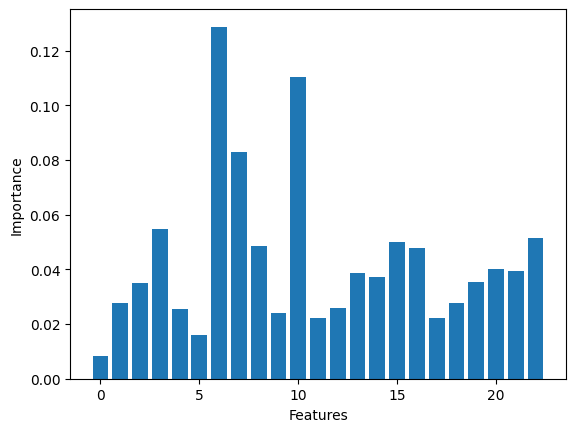

In [94]:
model = RandomForestClassifier()
# fit the model
model.fit(X_train_transform, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (featureNames[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [95]:
y_preds = model.predict(X_test_transform)

In [96]:
accuracy_score(y_test, y_preds), f1_score(y_test, y_preds)

(0.8064361447066972, 0.8055243295326803)

In [97]:
y_preds_train = model.predict(X_train_transform)

In [98]:
accuracy_score(y_train, y_preds_train), f1_score(y_train, y_preds_train)

(0.9999933400376954, 0.9999933662808054)

Feature: best_of, Score: 0.06854
Feature: kills, Score: 0.01216
Feature: assists, Score: 0.03386
Feature: deaths, Score: 0.10112
Feature: hs, Score: 0.00770
Feature: flash_assists, Score: 0.00952
Feature: kast, Score: 0.36992
Feature: kddiff, Score: 0.13597
Feature: adr, Score: 0.03240
Feature: fkdiff, Score: 0.01049
Feature: rating, Score: 0.11569
Feature: kills_ct, Score: 0.01020
Feature: deaths_ct, Score: 0.01139
Feature: kddiff_ct, Score: 0.00693
Feature: adr_ct, Score: 0.00747
Feature: kast_ct, Score: 0.00694
Feature: rating_ct, Score: 0.00800
Feature: kills_t, Score: 0.00931
Feature: deaths_t, Score: 0.01044
Feature: kddiff_t, Score: 0.00720
Feature: adr_t, Score: 0.00851
Feature: kast_t, Score: 0.00752
Feature: rating_t, Score: 0.00875


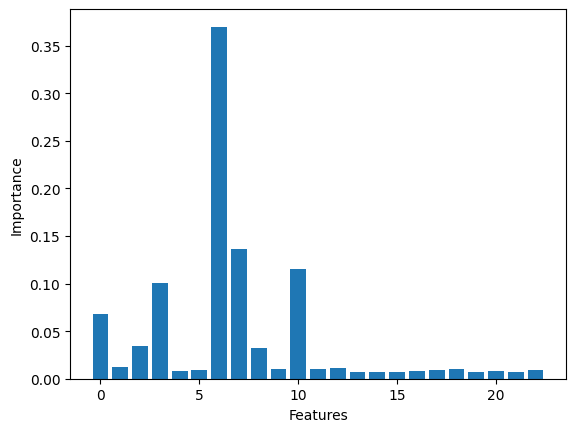

In [99]:
model = XGBClassifier()
# fit the model
model.fit(X_train_transform, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (featureNames[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [100]:
y_preds = model.predict(X_test_transform)

In [101]:
accuracy_score(y_test, y_preds), f1_score(y_test, y_preds)

(0.8118439980819436, 0.8123688335148633)

In [102]:
y_preds_train = model.predict(X_train_transform)

In [103]:
accuracy_score(y_train, y_preds_train), f1_score(y_train, y_preds_train)

(0.8429980486310448, 0.8420227309280008)

Feature: best_of, Score: 0.01265
Feature: kills, Score: 0.01866
Feature: assists, Score: 0.03771
Feature: deaths, Score: 0.06337
Feature: hs, Score: 0.02818
Feature: flash_assists, Score: 0.01585
Feature: kast, Score: 0.32909
Feature: kddiff, Score: 0.10011
Feature: adr, Score: 0.05706
Feature: fkdiff, Score: 0.02584
Feature: rating, Score: 0.03935
Feature: kills_ct, Score: 0.01840
Feature: deaths_ct, Score: 0.02063
Feature: kddiff_ct, Score: 0.01468
Feature: adr_ct, Score: 0.03366
Feature: kast_ct, Score: 0.02397
Feature: rating_ct, Score: 0.02369
Feature: kills_t, Score: 0.01890
Feature: deaths_t, Score: 0.01815
Feature: kddiff_t, Score: 0.01485
Feature: adr_t, Score: 0.03593
Feature: kast_t, Score: 0.02415
Feature: rating_t, Score: 0.02512


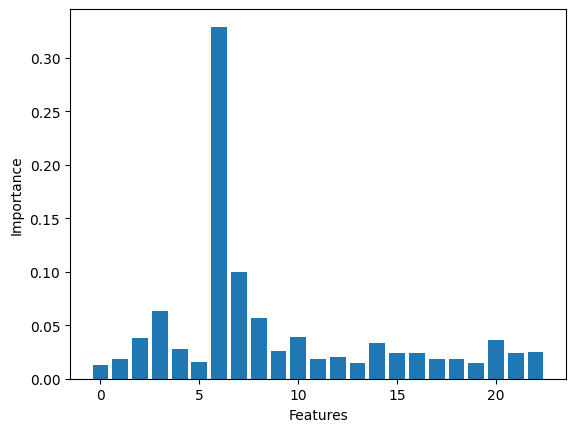

In [104]:
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train_transform, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (featureNames[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [105]:
y_preds = model.predict(X_test_transform)

In [106]:
accuracy_score(y_test, y_preds), f1_score(y_test, y_preds)

(0.7450583408812403, 0.7480916030534351)

# Reduce overfitting and Implement hyper-parameter tuning

In [113]:
sc = StandardScaler()
sc.fit(X_train)
X_train_transform = sc.transform(X_train)
X_test_transform = sc.transform(X_test)

In [114]:
# Implementing Random Forest Regression
model = RandomForestClassifier()

# Tuning the hyper-parameters using Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 7, 10]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)
grid_result = grid.fit(X_train_transform, y_train)

#print("Best Hyper parameters found using Grid Search: %s" % (grid_result.best_params_))

In [115]:
# Implementing Random Forest Regression
model = RandomForestClassifier()

# Tuning the hyper-parameters using Grid Search
param_grid = {
    'min_samples_leaf' : [1, 2, 3],
    'max_features' : [8, 10, 13]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)
grid_result = grid.fit(X_train_transform, y_train)

#print("Best Hyper parameters found using Grid Search: %s" % (grid_result.best_params_))

Feature: best_of, Score: 0.01293
Feature: kills, Score: 0.01203
Feature: assists, Score: 0.02426
Feature: deaths, Score: 0.06644
Feature: hs, Score: 0.00261
Feature: flash_assists, Score: 0.00244
Feature: kast, Score: 0.29150
Feature: kddiff, Score: 0.20154
Feature: adr, Score: 0.03373
Feature: fkdiff, Score: 0.00235
Feature: rating, Score: 0.19252
Feature: kills_ct, Score: 0.00331
Feature: deaths_ct, Score: 0.00973
Feature: kddiff_ct, Score: 0.01685
Feature: adr_ct, Score: 0.00704
Feature: kast_ct, Score: 0.03161
Feature: rating_ct, Score: 0.00790
Feature: kills_t, Score: 0.00318
Feature: deaths_t, Score: 0.01087
Feature: kddiff_t, Score: 0.01623
Feature: adr_t, Score: 0.00920
Feature: kast_t, Score: 0.01071
Feature: rating_t, Score: 0.03102


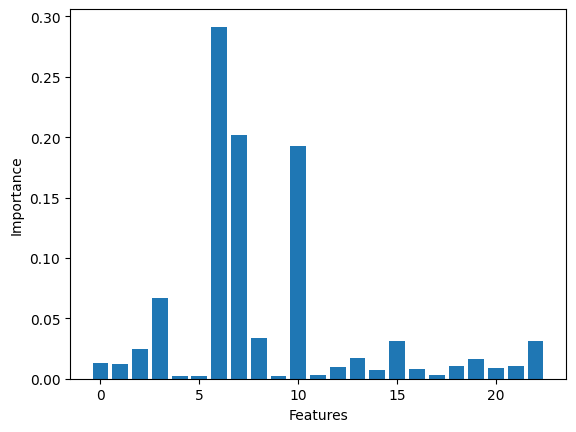

In [116]:
model = RandomForestClassifier(n_estimators=150, max_features=8, max_depth=10, min_samples_leaf=3)
# fit the model
model.fit(X_train_transform, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (featureNames[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [117]:
y_preds = model.predict(X_test_transform)
y_preds_train = model.predict(X_train_transform)
print("Training Scores: ", accuracy_score(y_train, y_preds_train), f1_score(y_train, y_preds_train))
print("Testing Scores: ", accuracy_score(y_test, y_preds), f1_score(y_test, y_preds))

Training Scores:  0.822272245939088 0.8211849528940349
Testing Scores:  0.8066759017528904 0.8069792802617229


In [118]:
# Implementing Random Forest Regression
model = XGBClassifier()

# Tuning the hyper-parameters using Grid Search
param_grid = {
    'reg_alpha' : [0, 1, 2],
    'reg_lambda' : [0, 1, 2]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)
grid_result = grid.fit(X_train_transform, y_train)

#print("Best Hyper parameters found using Grid Search: %s" % (grid_result.best_params_))

In [119]:
# Implementing Random Forest Regression
model = XGBClassifier()

# Tuning the hyper-parameters using Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 7, 10]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)
grid_result = grid.fit(X_train_transform, y_train)

#print("Best Hyper parameters found using Grid Search: %s" % (grid_result.best_params_))

In [120]:
# Implementing Random Forest Regression
model = XGBClassifier()

# Tuning the hyper-parameters using Grid Search
param_grid = {
    'max_leaves': [0, 1, 2]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)
grid_result = grid.fit(X_train_transform, y_train)

#print("Best Hyper parameters found using Grid Search: %s" % (grid_result.best_params_))

Feature: best_of, Score: 0.04459
Feature: kills, Score: 0.00822
Feature: assists, Score: 0.03009
Feature: deaths, Score: 0.07129
Feature: hs, Score: 0.00497
Feature: flash_assists, Score: 0.00703
Feature: kast, Score: 0.45129
Feature: kddiff, Score: 0.16382
Feature: adr, Score: 0.03502
Feature: fkdiff, Score: 0.00791
Feature: rating, Score: 0.10423
Feature: kills_ct, Score: 0.01044
Feature: deaths_ct, Score: 0.00915
Feature: kddiff_ct, Score: 0.00351
Feature: adr_ct, Score: 0.00397
Feature: kast_ct, Score: 0.00319
Feature: rating_ct, Score: 0.00580
Feature: kills_t, Score: 0.00838
Feature: deaths_t, Score: 0.00657
Feature: kddiff_t, Score: 0.00304
Feature: adr_t, Score: 0.00586
Feature: kast_t, Score: 0.00484
Feature: rating_t, Score: 0.00679


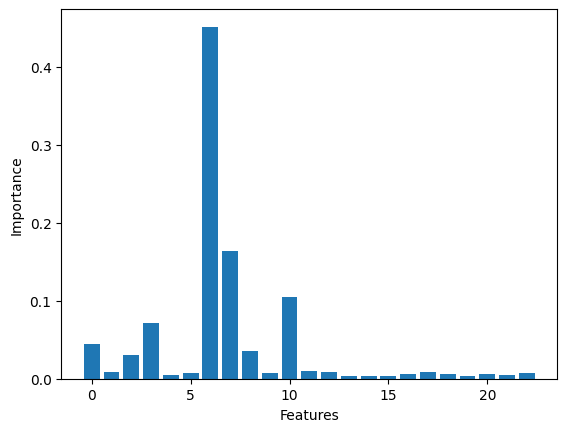

In [121]:
model = XGBClassifier(reg_alpha=2, reg_lambda=1, max_leaves=1, n_estimators=50, max_depth=5)
# fit the model
model.fit(X_train_transform, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (featureNames[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [122]:
y_preds = model.predict(X_test_transform)
y_preds_train = model.predict(X_train_transform)
print("Training Scores: ", accuracy_score(y_train, y_preds_train), f1_score(y_train, y_preds_train))
print("Testing Scores: ", accuracy_score(y_test, y_preds), f1_score(y_test, y_preds))

Training Scores:  0.8221390466929958 0.8209861647361647
Testing Scores:  0.8145346049336673 0.81499787414966


# Using all the features

In [123]:
X_full = playersData.drop("Match Result", axis=1)
y_full = playersData["Match Result"]

In [124]:
X_full = X_full.drop(columns=['player_name', 'player_id', 'match_id', 'event_id', 'event_name', 'team', 'date', 'opponent', 'country', 'map_1', 'map_2', 'map_3'], axis=1)

In [125]:
# imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
# imputer = imputer.fit(X_full)
# X_full = imputer.transform(X_full)

In [126]:
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

In [127]:
featureNames = {}
i=0
for var in X_full_train.describe().columns:
    featureNames[i] = var
    i += 1

In [128]:
# Normalizing the values
sc = StandardScaler()
sc.fit(X_full_train)
X_full_train_transform = sc.transform(X_full_train)
X_full_test_transform = sc.transform(X_full_test)

Feature: best_of, Score: 0.00706
Feature: kills, Score: 0.00169
Feature: assists, Score: 0.00880
Feature: deaths, Score: 0.01429
Feature: hs, Score: 0.00177
Feature: flash_assists, Score: 0.00269
Feature: kast, Score: 0.35736
Feature: kddiff, Score: 0.10801
Feature: adr, Score: 0.01629
Feature: fkdiff, Score: 0.00465
Feature: rating, Score: 0.05885
Feature: m1_kills, Score: 0.00149
Feature: m1_assists, Score: 0.01577
Feature: m1_deaths, Score: 0.05899
Feature: m1_hs, Score: 0.00260
Feature: m1_flash_assists, Score: 0.00272
Feature: m1_kast, Score: 0.00483
Feature: m1_kddiff, Score: 0.00318
Feature: m1_adr, Score: 0.00359
Feature: m1_fkdiff, Score: 0.00441
Feature: m1_rating, Score: 0.00240
Feature: m2_kills, Score: 0.00175
Feature: m2_assists, Score: 0.01030
Feature: m2_deaths, Score: 0.02608
Feature: m2_hs, Score: 0.00315
Feature: m2_flash_assists, Score: 0.00123
Feature: m2_kast, Score: 0.00243
Feature: m2_kddiff, Score: 0.00388
Feature: m2_adr, Score: 0.00165
Feature: m2_fkdiff, Sco

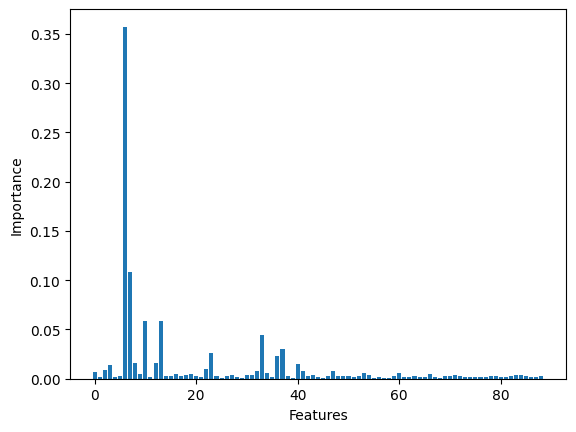

In [129]:
model_full = XGBClassifier(reg_alpha=2, reg_lambda=1, max_leaves=1, n_estimators=50, max_depth=5)
# fit the model
model_full.fit(X_full_train_transform, y_full_train)
# get importance
importance_full = model_full.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_full):
    print('Feature: %s, Score: %.5f' % (featureNames[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance_full))], importance_full)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [130]:
y_preds_full = model_full.predict(X_full_test_transform)
y_preds_train_full = model_full.predict(X_full_train_transform)
print("Training Scores: ", accuracy_score(y_full_train, y_preds_train_full), f1_score(y_full_train, y_preds_train_full))
print("Testing Scores: ", accuracy_score(y_full_test, y_preds_full), f1_score(y_full_test, y_preds_full))

Training Scores:  0.8443833207904043 0.841747375550288
Testing Scores:  0.8340881240343119 0.8326706072004298


# Selecting best features from the full list of features and then performing prediction

In [131]:
totalFeatures = {}
for i,v in enumerate(importance_full):
    totalFeatures[i] = v

In [132]:
featureNames = {}
i=0
for var in X_full.describe().columns:
    featureNames[i] = var
    i += 1

In [133]:
finalFeatures = {}

for var in totalFeatures:
    finalFeatures[featureNames[var]] = totalFeatures[var]

In [134]:
sortedFeatures = sorted(finalFeatures.items(), key=lambda item: item[1], reverse=True)

In [135]:
tempFeatures = []
for i in sortedFeatures[:80]:
    tempFeatures.append(i[0])

In [136]:
len(tempFeatures)

80

In [137]:
X_full_train[tempFeatures]

,kast,kddiff,m1_deaths,rating,m3_deaths,m3_kddiff,m2_deaths,m3_kast,adr,m1_assists,m3_rating,deaths,m2_assists,assists,kills_ct,kills_t,m3_assists,best_of,m3_hs,m1_kills_ct,m1_deaths_t,m2_deaths_ct,m1_kast,fkdiff,m1_fkdiff,m2_rating,m2_kills_t,m3_kills_t,m2_kddiff,m1_deaths_ct,m3_kills,m1_adr,m3_deaths_t,kddiff_ct,m3_adr,m1_kddiff,m2_hs,rating_ct,kddiff_t,m3_rating_t,deaths_ct,m3_kddiff_t,m3_rating_ct,adr_t,m1_kills_t,rating_t,m1_flash_assists,flash_assists,m1_kast_t,m2_deaths_t,m2_rating_ct,m1_hs,m3_deaths_ct,m2_kast,m1_rating,m3_kddiff_ct,deaths_t,m2_kast_ct,m2_rating_t,m3_adr_ct,m3_kills_ct,adr_ct,m1_rating_t,m2_kddiff_ct,m2_kills_ct,hs,m2_kills,m3_kast_t,kills,m3_kast_ct,m2_kast_t,m2_adr,m1_adr_t,m2_adr_t,m3_flash_assists,m1_kills,m2_kddiff_t,m3_adr_t,m1_adr_ct,kast_t
150459,67.9,4,18,1.16,NaN,NaN,NaN,NaN,83.6,3,NaN,18,NaN,3,11.0,11.0,NaN,1,NaN,11.0,11.0,NaN,67.9,-1,-1,NaN,NaN,NaN,NaN,7.0,NaN,83.6,NaN,4.0,NaN,4,NaN,1.17,0.0,NaN,7.0,NaN,NaN,81.4,11.0,1.16,0.0,0.0,66.7,NaN,NaN,14,NaN,NaN,1.16,NaN,11.0,NaN,NaN,NaN,NaN,86.2,1.16,NaN,NaN,14,NaN,NaN,22,NaN,NaN,NaN,81.4,NaN,NaN,22,NaN,NaN,86.2,66.7
227476,70.0,-2,21,0.95,NaN,NaN,NaN,NaN,65.4,5,NaN,21,NaN,5,9.0,10.0,NaN,1,NaN,9.0,10.0,NaN,70.0,4,4,NaN,NaN,NaN,NaN,11.0,NaN,65.4,NaN,-2.0,NaN,-2,NaN,0.81,0.0,NaN,11.0,NaN,NaN,73.4,10.0,1.09,1.0,1.0,80.0,NaN,NaN,4,NaN,NaN,0.95,NaN,10.0,NaN,NaN,NaN,NaN,57.5,1.09,NaN,NaN,4,NaN,NaN,19,NaN,NaN,NaN,73.4,NaN,NaN,19,NaN,NaN,57.5,80.0
283040,76.2,-11,33,0.82,NaN,NaN,NaN,NaN,70.2,10,NaN,33,NaN,10,11.0,11.0,NaN,1,NaN,11.0,18.0,NaN,76.2,-4,-4,NaN,NaN,NaN,NaN,15.0,NaN,70.2,NaN,-4.0,NaN,-11,NaN,0.82,-7.0,NaN,15.0,NaN,NaN,69.5,11.0,0.81,1.0,1.0,66.7,NaN,NaN,17,NaN,NaN,0.82,NaN,18.0,NaN,NaN,NaN,NaN,71.0,0.81,NaN,NaN,17,NaN,NaN,22,NaN,NaN,NaN,69.5,NaN,NaN,22,NaN,NaN,71.0,66.7
12493,56.4,-6,18,0.88,NaN,NaN,21.0,NaN,63.2,5,NaN,39,2.0,7,17.0,16.0,NaN,3,NaN,6.0,8.0,11.0,58.6,-5,-2,0.68,3.0,NaN,-7.0,10.0,NaN,67.4,NaN,-4.0,NaN,1,5.0,0.83,-2.0,NaN,21.0,NaN,NaN,61.3,13.0,0.93,1.0,1.0,60.0,10.0,0.99,6,NaN,53.8,1.05,NaN,18.0,60.0,0.27,NaN,NaN,65.0,1.40,0.0,11.0,11,14.0,NaN,33,NaN,45.5,58.5,83.2,31.4,NaN,19,-7.0,NaN,50.6,53.8
29512,64.7,14,17,1.18,NaN,NaN,15.0,NaN,83.5,0,NaN,32,2.0,2,26.0,20.0,NaN,3,NaN,14.0,5.0,9.0,57.1,-1,1,1.16,12.0,NaN,9.0,12.0,NaN,96.2,NaN,5.0,NaN,5,10.0,1.04,9.0,NaN,21.0,NaN,NaN,83.9,8.0,1.38,0.0,1.0,83.3,6.0,1.01,12,NaN,70.0,1.21,NaN,11.0,66.7,1.31,NaN,NaN,83.2,1.57,3.0,12.0,22,24.0,NaN,46,NaN,73.3,74.6,103.5,76.1,NaN,22,6.0,NaN,93.3,76.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182457,73.3,3,21,1.17,NaN,NaN,NaN,NaN,85.3,3,NaN,21,NaN,3,11.0,13.0,NaN,1,NaN,11.0,12.0,NaN,73.3,-2,-2,NaN,NaN,NaN,NaN,9.0,NaN,85.3,NaN,2.0,NaN,3,NaN,0.94,1.0,NaN,9.0,NaN,NaN,102.3,13.0,1.39,1.0,1.0,73.3,NaN,NaN,13,NaN,NaN,1.17,NaN,12.0,NaN,NaN,NaN,NaN,68.3,1.39,NaN,NaN,13,NaN,NaN,24,NaN,NaN,NaN,102.3,NaN,NaN,24,NaN,NaN,68.3,73.3
159425,72.4,3,19,1.13,NaN,NaN,NaN,NaN,74.9,7,NaN,19,NaN,7,9.0,13.0,NaN,1,NaN,9.0,12.0,NaN,72.4,2,2,NaN,NaN,NaN,NaN,7.0,NaN,74.9,NaN,2.0,NaN,3,NaN,0.90,1.0,NaN,7.0,NaN,NaN,84.9,13.0,1.35,4.0,4.0,80.0,NaN,NaN,8,NaN,NaN,1.13,NaN,12.0,NaN,NaN,NaN,NaN,64.2,1.35,NaN,NaN,8,NaN,NaN,22,NaN,NaN,NaN,84.9,NaN,NaN,22,NaN,NaN,64.2,80.0
201996,68.0,1,18,1.03,NaN,NaN,NaN,NaN,80.4,5,NaN,18,NaN,5,7.0,12.0,NaN,1,NaN,7.0,7.0,NaN,68.0,-2,-2,NaN,NaN,NaN,NaN,11.0,NaN,80.4,NaN,-4.0,NaN,1,NaN,0.66,5.0,NaN,11.0,NaN,NaN,105.0,12.0,1.59,0.0,0.0,70.0,NaN,NaN,12,NaN,NaN,1.03,NaN,7.0,NaN,NaN,NaN,NaN,64.0,1.59,NaN,NaN,12,NaN,NaN,19,NaN,NaN,NaN,105.0,NaN,NaN,19,NaN,NaN,64.0,70.0
225443,74.5,7,22,1.18,NaN,NaN,8.0,NaN,76.3,4,NaN,30,4.0,8,23.0,14.0,NaN,3,NaN,7.0,10.0,6.0,67.9,5,1,1.75,4.0,NaN,12.0,12.0,NaN,60.2,NaN,5.0,NaN,-5,4.0,1.12,2.0,NaN,18.0,NaN,NaN,86.5,10.0,1.27,2.0,3.0,76.9,2.0,1.69,9,Na

In [138]:
# Normalizing the values
sc = StandardScaler()
sc.fit(X_full_train[tempFeatures])
X_full_train_transform = sc.transform(X_full_train[tempFeatures])
X_full_test_transform = sc.transform(X_full_test[tempFeatures])

Feature: kast, Score: 0.34663
Feature: kddiff, Score: 0.11432
Feature: m1_deaths, Score: 0.06080
Feature: rating, Score: 0.06144
Feature: m3_deaths, Score: 0.04392
Feature: m3_kddiff, Score: 0.03219
Feature: m2_deaths, Score: 0.02877
Feature: m3_kast, Score: 0.02349
Feature: adr, Score: 0.01599
Feature: m1_assists, Score: 0.01259
Feature: m3_rating, Score: 0.01694
Feature: deaths, Score: 0.01491
Feature: m2_assists, Score: 0.01020
Feature: assists, Score: 0.01241
Feature: kills_ct, Score: 0.01035
Feature: kills_t, Score: 0.00608
Feature: m3_assists, Score: 0.00789
Feature: best_of, Score: 0.00720
Feature: m3_hs, Score: 0.00134
Feature: m1_kills_ct, Score: 0.00508
Feature: m1_deaths_t, Score: 0.00457
Feature: m2_deaths_ct, Score: 0.00446
Feature: m1_kast, Score: 0.00483
Feature: fkdiff, Score: 0.00357
Feature: m1_fkdiff, Score: 0.00361
Feature: m2_rating, Score: 0.00510
Feature: m2_kills_t, Score: 0.00417
Feature: m3_kills_t, Score: 0.00351
Feature: m2_kddiff, Score: 0.00605
Feature: m1

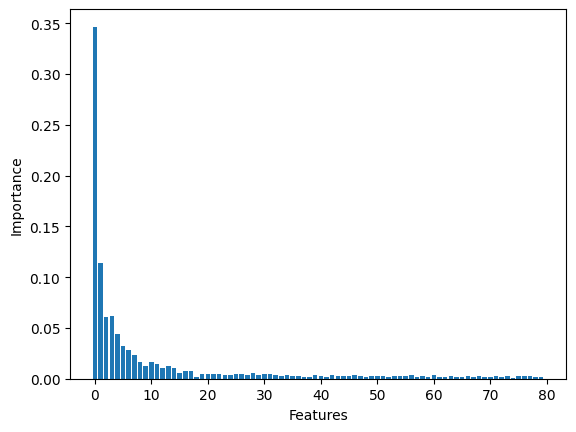

In [139]:
model_full = XGBClassifier(reg_alpha=2, reg_lambda=1, max_leaves=1, n_estimators=50, max_depth=5)
# fit the model
model_full.fit(X_full_train_transform, y_full_train)
# get importance
importance_full = model_full.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_full):
    print('Feature: %s, Score: %.5f' % (tempFeatures[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance_full))], importance_full)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [140]:
y_preds_full = model_full.predict(X_full_test_transform)
y_preds_train_full = model_full.predict(X_full_train_transform)
print("Training Scores: ", accuracy_score(y_full_train, y_preds_train_full), f1_score(y_full_train, y_preds_train_full))
print("Testing Scores: ", accuracy_score(y_full_test, y_preds_full), f1_score(y_full_test, y_preds_full))

Training Scores:  0.8443300410919674 0.8417874886623617
Testing Scores:  0.8351803505780809 0.8339015812505034


# Using one hot encoding

In [141]:
X_full = playersData.drop("Match Result", axis=1)
y_full = playersData["Match Result"]

In [142]:
map1 = pd.get_dummies(playersData[['map_1']])
map2 = pd.get_dummies(playersData[['map_2']])
map3 = pd.get_dummies(playersData[['map_3']])

In [143]:
X_full = pd.concat([X_full, map1], axis=1)
X_full = pd.concat([X_full, map2], axis=1)
X_full = pd.concat([X_full, map3], axis=1)

In [144]:
X_full = X_full.drop(columns=['player_name', 'player_id', 'match_id', 'event_id', 'event_name', 'team', 'date', 'opponent', 'country', 'map_1', 'map_2', 'map_3'], axis=1)

In [145]:
# imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
# imputer = imputer.fit(X_full)
# X_full = imputer.transform(X_full)

In [146]:
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

In [147]:
featureNames = {}
i=0
for var in X_full_train.describe().columns:
    featureNames[i] = var
    i += 1

In [148]:
# Normalizing the values
sc = StandardScaler()
sc.fit(X_full_train)
X_full_train_transform = sc.transform(X_full_train)
X_full_test_transform = sc.transform(X_full_test)

Feature: best_of, Score: 0.00672
Feature: kills, Score: 0.00148
Feature: assists, Score: 0.00931
Feature: deaths, Score: 0.01238
Feature: hs, Score: 0.00221
Feature: flash_assists, Score: 0.00242
Feature: kast, Score: 0.30592
Feature: kddiff, Score: 0.13776
Feature: adr, Score: 0.01419
Feature: fkdiff, Score: 0.00259
Feature: rating, Score: 0.06144
Feature: m1_kills, Score: 0.00164
Feature: m1_assists, Score: 0.01525
Feature: m1_deaths, Score: 0.05687
Feature: m1_hs, Score: 0.00179
Feature: m1_flash_assists, Score: 0.00380
Feature: m1_kast, Score: 0.00403
Feature: m1_kddiff, Score: 0.00226
Feature: m1_adr, Score: 0.00358
Feature: m1_fkdiff, Score: 0.00428
Feature: m1_rating, Score: 0.00180
Feature: m2_kills, Score: 0.00198
Feature: m2_assists, Score: 0.00980
Feature: m2_deaths, Score: 0.03311
Feature: m2_hs, Score: 0.00218
Feature: m2_flash_assists, Score: 0.00383
Feature: m2_kast, Score: 0.00322
Feature: m2_kddiff, Score: 0.00358
Feature: m2_adr, Score: 0.00138
Feature: m2_fkdiff, Sco

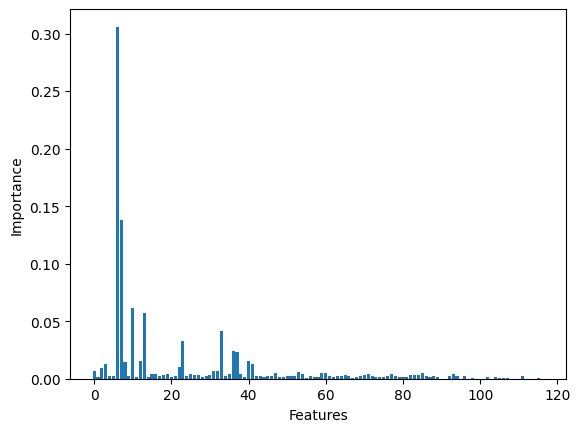

In [149]:
model_full = XGBClassifier(reg_alpha=2, reg_lambda=1, max_leaves=1, n_estimators=50, max_depth=5)
# fit the model
model_full.fit(X_full_train_transform, y_full_train)
# get importance
importance_full = model_full.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_full):
    print('Feature: %s, Score: %.5f' % (featureNames[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance_full))], importance_full)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [150]:
y_preds_full = model_full.predict(X_full_test_transform)
y_preds_train_full = model_full.predict(X_full_train_transform)
print("Training Scores: ", accuracy_score(y_full_train, y_preds_train_full), f1_score(y_full_train, y_preds_train_full))
print("Testing Scores: ", accuracy_score(y_full_test, y_preds_full), f1_score(y_full_test, y_preds_full))

Training Scores:  0.8444699003003643 0.8417872023305443
Testing Scores:  0.8365656135116415 0.8353241175681118


# Selecting best features from the full list of features and then performing prediction

In [151]:
totalFeatures = {}
for i,v in enumerate(importance_full):
    totalFeatures[i] = v

In [152]:
featureNames = {}
i=0
for var in X_full_train.describe().columns:
    featureNames[i] = var
    i += 1

In [153]:
finalFeatures = {}

for var in totalFeatures:
    finalFeatures[featureNames[var]] = totalFeatures[var]

In [154]:
sortedFeatures = sorted(finalFeatures.items(), key=lambda item: item[1], reverse=True)

In [155]:
tempFeatures = []
for i in sortedFeatures[:120]:
    tempFeatures.append(i[0])

In [156]:
# Normalizing the values
sc = StandardScaler()
sc.fit(X_full_train[tempFeatures])
X_full_train_transform = sc.transform(X_full_train[tempFeatures])
X_full_test_transform = sc.transform(X_full_test[tempFeatures])

Feature: kast, Score: 0.30652
Feature: kddiff, Score: 0.13803
Feature: rating, Score: 0.06156
Feature: m1_deaths, Score: 0.05698
Feature: m3_deaths, Score: 0.04183
Feature: m2_deaths, Score: 0.03317
Feature: m3_kast, Score: 0.02409
Feature: m3_kddiff, Score: 0.02293
Feature: m1_assists, Score: 0.01271
Feature: m3_rating, Score: 0.01512
Feature: adr, Score: 0.01422
Feature: kills_ct, Score: 0.01252
Feature: deaths, Score: 0.01240
Feature: m2_assists, Score: 0.00982
Feature: assists, Score: 0.01087
Feature: best_of, Score: 0.00673
Feature: m3_assists, Score: 0.00672
Feature: m3_kills, Score: 0.00630
Feature: m1_kills_ct, Score: 0.00562
Feature: m1_kills_t, Score: 0.00436
Feature: m3_kddiff_t, Score: 0.00511
Feature: m1_deaths_t, Score: 0.00405
Feature: kills_t, Score: 0.00542
Feature: m1_fkdiff, Score: 0.00390
Feature: m3_flash_assists, Score: 0.00424
Feature: m3_kills_ct, Score: 0.00418
Feature: m2_kills_t, Score: 0.00418
Feature: m1_kast, Score: 0.00403
Feature: m3_adr, Score: 0.00402


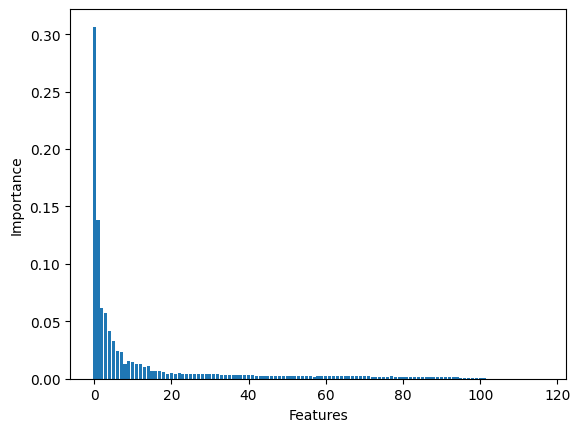

In [157]:
model_full = XGBClassifier(reg_alpha=2, reg_lambda=1, max_leaves=1, n_estimators=50, max_depth=5)
# fit the model
model_full.fit(X_full_train_transform, y_full_train)
# get importance
importance_full = model_full.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_full):
    print('Feature: %s, Score: %.5f' % (tempFeatures[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance_full))], importance_full)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [158]:
y_preds_full = model_full.predict(X_full_test_transform)
y_preds_train_full = model_full.predict(X_full_train_transform)
print("Training Scores: ", accuracy_score(y_full_train, y_preds_train_full), f1_score(y_full_train, y_preds_train_full))
print("Testing Scores: ", accuracy_score(y_full_test, y_preds_full), f1_score(y_full_test, y_preds_full))

Training Scores:  0.8444699003003643 0.8417872023305443
Testing Scores:  0.8365656135116415 0.8353241175681118


## Performing prediction without any hyper-parameters 

Feature: kast, Score: 0.22368
Feature: kddiff, Score: 0.10079
Feature: rating, Score: 0.05463
Feature: m1_deaths, Score: 0.08019
Feature: m3_deaths, Score: 0.05314
Feature: m2_deaths, Score: 0.02516
Feature: m3_kast, Score: 0.02126
Feature: m3_kddiff, Score: 0.01791
Feature: m1_assists, Score: 0.01751
Feature: m3_rating, Score: 0.01563
Feature: adr, Score: 0.01449
Feature: kills_ct, Score: 0.00383
Feature: deaths, Score: 0.01312
Feature: m2_assists, Score: 0.00985
Feature: assists, Score: 0.01056
Feature: best_of, Score: 0.01277
Feature: m3_assists, Score: 0.00978
Feature: m3_kills, Score: 0.00385
Feature: m1_kills_ct, Score: 0.00540
Feature: m1_kills_t, Score: 0.00316
Feature: m3_kddiff_t, Score: 0.00196
Feature: m1_deaths_t, Score: 0.00576
Feature: kills_t, Score: 0.00339
Feature: m1_fkdiff, Score: 0.00308
Feature: m3_flash_assists, Score: 0.00225
Feature: m3_kills_ct, Score: 0.00341
Feature: m2_kills_t, Score: 0.00360
Feature: m1_kast, Score: 0.00336
Feature: m3_adr, Score: 0.00554


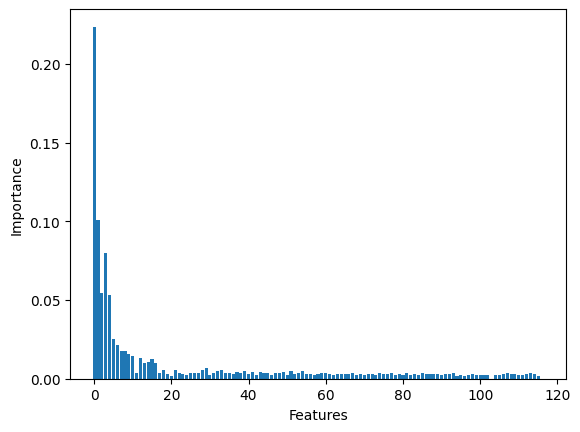

In [159]:
model_full = XGBClassifier()
# fit the model
model_full.fit(X_full_train_transform, y_full_train)
# get importance
importance_full = model_full.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_full):
    print('Feature: %s, Score: %.5f' % (tempFeatures[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance_full))], importance_full)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [160]:
y_preds_full = model_full.predict(X_full_test_transform)
y_preds_train_full = model_full.predict(X_full_train_transform)
print("Training Scores: ", accuracy_score(y_full_train, y_preds_train_full), f1_score(y_full_train, y_preds_train_full))
print("Testing Scores: ", accuracy_score(y_full_test, y_preds_full), f1_score(y_full_test, y_preds_full))

Training Scores:  0.8722619229975158 0.8709634015069967
Testing Scores:  0.8373381639938196 0.8369298151906848


# Implementing XGBoost Classifier on selected features

In [192]:
# Normalizing the values
sc = StandardScaler()
sc.fit(X_train[['deaths', 'kast', 'kddiff', 'adr', 'rating']])
X_train_transform = sc.transform(X_train[['deaths', 'kast', 'kddiff', 'adr', 'rating']])
X_test_transform = sc.transform(X_test[['deaths', 'kast', 'kddiff', 'adr', 'rating']])

Feature: deaths, Score: 0.12622
Feature: kast, Score: 0.46098
Feature: kddiff, Score: 0.18794
Feature: adr, Score: 0.05233
Feature: rating, Score: 0.17253


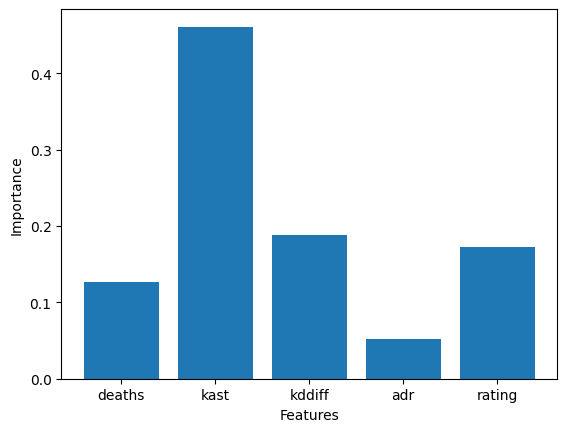

In [201]:
selectedFeatures = ['deaths', 'kast', 'kddiff', 'adr', 'rating']
model = XGBClassifier(reg_alpha=1)
# fit the model
model.fit(X_train_transform, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (selectedFeatures[i],v))
# plot feature importance
plt.bar([selectedFeatures[x] for x in range(len(importance))], importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [202]:
y_preds = model.predict(X_test_transform)

In [203]:
accuracy_score(y_test, y_preds), f1_score(y_test, y_preds)

(0.8001491821620758, 0.8008706269575835)

In [204]:
y_preds_train = model.predict(X_train_transform)

In [205]:
accuracy_score(y_train, y_preds_train), f1_score(y_train, y_preds_train)

(0.8134211560362569, 0.8126149627102772)

# Feature Engineering

In [161]:
matchID = {}

for index, row in resultsData.iterrows():
    i = 1;
    if (row['match_id'] not in matchID):
        matchID[row['match_id']] = {}
        matchID[row['match_id']]['map_1_name'] = row['_map']
        matchID[row['match_id']]['map_1_winner'] = row['map_winner']
        matchID[row['match_id']]['team_1'] = row['team_1']
        matchID[row['match_id']]['team_2'] = row['team_2']
        matchID[row['match_id']]['result_1_1'] = row['result_1']
        matchID[row['match_id']]['result_1_2'] = row['result_2']
        matchID[row['match_id']]['map_wins_1'] = row['map_wins_1']
        matchID[row['match_id']]['map_wins_2'] = row['map_wins_2']
    else:
        if "map_2_name" not in matchID[row['match_id']]:
            matchID[row['match_id']]['map_2_name'] = row['_map']
            matchID[row['match_id']]['map_2_winner'] = row['map_winner']
            matchID[row['match_id']]['result_2_1'] = row['result_1']
            matchID[row['match_id']]['result_2_2'] = row['result_2']
        elif "map_3_name" not in matchID[row['match_id']]:
            matchID[row['match_id']]['map_3_name'] = row['_map']
            matchID[row['match_id']]['map_3_winner'] = row['map_winner']
            matchID[row['match_id']]['result_3_1'] = row['result_1']
            matchID[row['match_id']]['result_3_2'] = row['result_2']
        elif "map_4_name" not in matchID[row['match_id']]:
            matchID[row['match_id']]['map_4_name'] = row['_map']
            matchID[row['match_id']]['map_4_winner'] = row['map_winner']
            matchID[row['match_id']]['result_4_1'] = row['result_1']
            matchID[row['match_id']]['result_4_2'] = row['result_2']
        elif "map_5_name" not in matchID[row['match_id']]:
            matchID[row['match_id']]['map_5_name'] = row['_map']
            matchID[row['match_id']]['map_5_winner'] = row['map_winner']
            matchID[row['match_id']]['result_5_1'] = row['result_1']
            matchID[row['match_id']]['result_5_2'] = row['result_2']

In [162]:
# Extracting the result attributes for each row in players data
indexNames = ["map_wins", "m1_winner", "m1_opponent_result", "m1_team_result", "m2_winner", "m2_opponent_result", "m2_team_result", "m3_winner", "m3_opponent_result", "m3_team_result"]
resultRows = []

for index, row in playersData.iterrows():
    rows = []
    if (matchID[row['match_id']]["team_1"] == row["team"]):
        rows.append(matchID[row['match_id']]["map_wins_1"])
    else:
        rows.append(matchID[row['match_id']]["map_wins_2"])
    if (matchID[row['match_id']]["map_1_name"] == row["map_1"]):
        if(matchID[row['match_id']]["map_1_winner"] == 1):
            if (matchID[row['match_id']]["team_1"] == row["team"]):
                rows.append(1)
            else:
                rows.append(0)
        else:
            if (matchID[row['match_id']]["team_2"] == row["team"]):
                rows.append(1)
            else:
                rows.append(0)
        if (matchID[row['match_id']]["team_1"] == row["team"]):
            rows.append(matchID[row['match_id']]["result_1_2"])
            rows.append(matchID[row['match_id']]["result_1_1"])
        else:
            rows.append(matchID[row['match_id']]["result_1_1"])
            rows.append(matchID[row['match_id']]["result_1_2"])
            
        if("map_2_name" in matchID[row['match_id']]):
            if (matchID[row['match_id']]["map_2_name"] == row["map_2"]):
                if(matchID[row['match_id']]["map_2_winner"] == 1):
                    if (matchID[row['match_id']]["team_1"] == row["team"]):
                        rows.append(1)
                    else:
                        rows.append(0)
                else:
                    if (matchID[row['match_id']]["team_2"] == row["team"]):
                        rows.append(1)
                    else:
                        rows.append(0)
                if (matchID[row['match_id']]["team_1"] == row["team"]):
                    rows.append(matchID[row['match_id']]["result_2_2"])
                    rows.append(matchID[row['match_id']]["result_2_1"])
                else:
                    rows.append(matchID[row['match_id']]["result_2_1"])
                    rows.append(matchID[row['match_id']]["result_2_2"])
                    
                if("map_3_name" in matchID[row['match_id']]):
                    if(matchID[row['match_id']]["map_3_winner"] == 1):
                        if (matchID[row['match_id']]["team_1"] == row["team"]):
                            rows.append(1)
                        else:
                            rows.append(0)
                    else:
                        if (matchID[row['match_id']]["team_2"] == row["team"]):
                            rows.append(1)
                        else:
                            rows.append(0)
                    if (matchID[row['match_id']]["team_1"] == row["team"]):
                        rows.append(matchID[row['match_id']]["result_3_2"])
                        rows.append(matchID[row['match_id']]["result_3_1"])
                    else:
                        rows.append(matchID[row['match_id']]["result_3_1"])
                        rows.append(matchID[row['match_id']]["result_3_2"])
            else:
                if(matchID[row['match_id']]["map_3_winner"] == 1):
                    if (matchID[row['match_id']]["team_1"] == row["team"]):
                        rows.append(1)
                    else:
                        rows.append(0)
                else:
                    if (matchID[row['match_id']]["team_2"] == row["team"]):
                        rows.append(1)
                    else:
                        rows.append(0)
                if (matchID[row['match_id']]["team_1"] == row["team"]):
                    rows.append(matchID[row['match_id']]["result_3_2"])
                    rows.append(matchID[row['match_id']]["result_3_1"])
                else:
                    rows.append(matchID[row['match_id']]["result_3_1"])
                    rows.append(matchID[row['match_id']]["result_3_2"])
                    
                if("map_3_name" in matchID[row['match_id']]):
                    if(matchID[row['match_id']]["map_2_winner"] == 1):
                        if (matchID[row['match_id']]["team_1"] == row["team"]):
                            rows.append(1)
                        else:
                            rows.append(0)
                    else:
                        if (matchID[row['match_id']]["team_2"] == row["team"]):
                            rows.append(1)
                        else:
                            rows.append(0)
                    if (matchID[row['match_id']]["team_1"] == row["team"]):
                        rows.append(matchID[row['match_id']]["result_2_2"])
                        rows.append(matchID[row['match_id']]["result_2_1"])
                    else:
                        rows.append(matchID[row['match_id']]["result_2_1"])
                        rows.append(matchID[row['match_id']]["result_2_2"])
    elif (matchID[row['match_id']]["map_2_name"] == row["map_1"]):
        if(matchID[row['match_id']]["map_2_winner"] == 1):
            if (matchID[row['match_id']]["team_1"] == row["team"]):
                rows.append(1)
            else:
                rows.append(0)
        else:
            if (matchID[row['match_id']]["team_2"] == row["team"]):
                rows.append(1)
            else:
                rows.append(0)
        if (matchID[row['match_id']]["team_1"] == row["team"]):
            rows.append(matchID[row['match_id']]["result_2_2"])
            rows.append(matchID[row['match_id']]["result_2_1"])
        else:
            rows.append(matchID[row['match_id']]["result_2_1"])
            rows.append(matchID[row['match_id']]["result_2_2"])
            
        if (matchID[row['match_id']]["map_1_name"] == row["map_2"]):
            if(matchID[row['match_id']]["map_1_winner"] == 1):
                if (matchID[row['match_id']]["team_1"] == row["team"]):
                    rows.append(1)
                else:
                    rows.append(0)
            else:
                if (matchID[row['match_id']]["team_2"] == row["team"]):
                    rows.append(1)
                else:
                    rows.append(0)
            if (matchID[row['match_id']]["team_1"] == row["team"]):
                rows.append(matchID[row['match_id']]["result_1_2"])
                rows.append(matchID[row['match_id']]["result_1_1"])
            else:
                rows.append(matchID[row['match_id']]["result_1_1"])
                rows.append(matchID[row['match_id']]["result_1_2"])
                
            if("map_3_name" in matchID[row['match_id']]):
                if(matchID[row['match_id']]["map_3_winner"] == 1):
                    if (matchID[row['match_id']]["team_1"] == row["team"]):
                        rows.append(1)
                    else:
                        rows.append(0)
                else:
                    if (matchID[row['match_id']]["team_2"] == row["team"]):
                        rows.append(1)
                    else:
                        rows.append(0)
                if (matchID[row['match_id']]["team_1"] == row["team"]):
                    rows.append(matchID[row['match_id']]["result_3_2"])
                    rows.append(matchID[row['match_id']]["result_3_1"])
                else:
                    rows.append(matchID[row['match_id']]["result_3_1"])
                    rows.append(matchID[row['match_id']]["result_3_2"])
        
        else:
            if(matchID[row['match_id']]["map_3_winner"] == 1):
                if (matchID[row['match_id']]["team_1"] == row["team"]):
                    rows.append(1)
                else:
                    rows.append(0)
            else:
                if (matchID[row['match_id']]["team_2"] == row["team"]):
                    rows.append(1)
                else:
                    rows.append(0)
            if (matchID[row['match_id']]["team_1"] == row["team"]):
                rows.append(matchID[row['match_id']]["result_3_2"])
                rows.append(matchID[row['match_id']]["result_3_1"])
            else:
                rows.append(matchID[row['match_id']]["result_3_1"])
                rows.append(matchID[row['match_id']]["result_3_2"])
                
            if("map_1_name" in matchID[row['match_id']]):
                if(matchID[row['match_id']]["map_1_winner"] == 1):
                    if (matchID[row['match_id']]["team_1"] == row["team"]):
                        rows.append(1)
                    else:
                        rows.append(0)
                else:
                    if (matchID[row['match_id']]["team_2"] == row["team"]):
                        rows.append(1)
                    else:
                        rows.append(0)
                if (matchID[row['match_id']]["team_1"] == row["team"]):
                    rows.append(matchID[row['match_id']]["result_1_2"])
                    rows.append(matchID[row['match_id']]["result_1_1"])
                else:
                    rows.append(matchID[row['match_id']]["result_1_1"])
                    rows.append(matchID[row['match_id']]["result_1_2"])
    elif (matchID[row['match_id']]["map_3_name"] == row["map_1"]):
        if(matchID[row['match_id']]["map_3_winner"] == 1):
            if (matchID[row['match_id']]["team_1"] == row["team"]):
                rows.append(1)
            else:
                rows.append(0)
        else:
            if (matchID[row['match_id']]["team_2"] == row["team"]):
                rows.append(1)
            else:
                rows.append(0)
        if (matchID[row['match_id']]["team_1"] == row["team"]):
            rows.append(matchID[row['match_id']]["result_3_2"])
            rows.append(matchID[row['match_id']]["result_2_1"])
        else:
            rows.append(matchID[row['match_id']]["result_3_1"])
            rows.append(matchID[row['match_id']]["result_3_2"])
            
        if (matchID[row['match_id']]["map_1_name"] == row["map_2"]):
            if(matchID[row['match_id']]["map_1_winner"] == 1):
                if (matchID[row['match_id']]["team_1"] == row["team"]):
                    rows.append(1)
                else:
                    rows.append(0)
            else:
                if (matchID[row['match_id']]["team_2"] == row["team"]):
                    rows.append(1)
                else:
                    rows.append(0)
            if (matchID[row['match_id']]["team_1"] == row["team"]):
                rows.append(matchID[row['match_id']]["result_1_2"])
                rows.append(matchID[row['match_id']]["result_1_1"])
            else:
                rows.append(matchID[row['match_id']]["result_1_1"])
                rows.append(matchID[row['match_id']]["result_1_2"])
                
            if("map_2_name" in matchID[row['match_id']]):
                if(matchID[row['match_id']]["map_2_winner"] == 1):
                    if (matchID[row['match_id']]["team_1"] == row["team"]):
                        rows.append(1)
                    else:
                        rows.append(0)
                else:
                    if (matchID[row['match_id']]["team_2"] == row["team"]):
                        rows.append(1)
                    else:
                        rows.append(0)
                if (matchID[row['match_id']]["team_1"] == row["team"]):
                    rows.append(matchID[row['match_id']]["result_2_2"])
                    rows.append(matchID[row['match_id']]["result_2_1"])
                else:
                    rows.append(matchID[row['match_id']]["result_2_1"])
                    rows.append(matchID[row['match_id']]["result_2_2"])
        
        else:
            if(matchID[row['match_id']]["map_2_winner"] == 1):
                if (matchID[row['match_id']]["team_1"] == row["team"]):
                    rows.append(1)
                else:
                    rows.append(0)
            else:
                if (matchID[row['match_id']]["team_2"] == row["team"]):
                    rows.append(1)
                else:
                    rows.append(0)
            if (matchID[row['match_id']]["team_1"] == row["team"]):
                rows.append(matchID[row['match_id']]["result_2_2"])
                rows.append(matchID[row['match_id']]["result_2_1"])
            else:
                rows.append(matchID[row['match_id']]["result_2_1"])
                rows.append(matchID[row['match_id']]["result_2_2"])
                
            if("map_1_name" in matchID[row['match_id']]):
                if(matchID[row['match_id']]["map_1_winner"] == 1):
                    if (matchID[row['match_id']]["team_1"] == row["team"]):
                        rows.append(1)
                    else:
                        rows.append(0)
                else:
                    if (matchID[row['match_id']]["team_2"] == row["team"]):
                        rows.append(1)
                    else:
                        rows.append(0)
                if (matchID[row['match_id']]["team_1"] == row["team"]):
                    rows.append(matchID[row['match_id']]["result_1_2"])
                    rows.append(matchID[row['match_id']]["result_1_1"])
                else:
                    rows.append(matchID[row['match_id']]["result_1_1"])
                    rows.append(matchID[row['match_id']]["result_1_2"])
                    
    if(len(rows)<10):
        temp = 10-len(rows)
        for i in range(temp):
            rows.append(np.nan)
    resultRows.append(rows)


In [169]:
columnNames = []
flag = 0

for column in playersData.columns:
    if (column == "kills"):
        flag = 1
    if(column == "Match Result"):
        flag = 0
    if(flag == 1):
        columnNames.append(column)
        
columnNames

['kills',
 'assists',
 'deaths',
 'hs',
 'flash_assists',
 'kast',
 'kddiff',
 'adr',
 'fkdiff',
 'rating',
 'm1_kills',
 'm1_assists',
 'm1_deaths',
 'm1_hs',
 'm1_flash_assists',
 'm1_kast',
 'm1_kddiff',
 'm1_adr',
 'm1_fkdiff',
 'm1_rating',
 'm2_kills',
 'm2_assists',
 'm2_deaths',
 'm2_hs',
 'm2_flash_assists',
 'm2_kast',
 'm2_kddiff',
 'm2_adr',
 'm2_fkdiff',
 'm2_rating',
 'm3_kills',
 'm3_assists',
 'm3_deaths',
 'm3_hs',
 'm3_flash_assists',
 'm3_kast',
 'm3_kddiff',
 'm3_adr',
 'm3_fkdiff',
 'm3_rating',
 'kills_ct',
 'deaths_ct',
 'kddiff_ct',
 'adr_ct',
 'kast_ct',
 'rating_ct',
 'kills_t',
 'deaths_t',
 'kddiff_t',
 'adr_t',
 'kast_t',
 'rating_t',
 'm1_kills_ct',
 'm1_deaths_ct',
 'm1_kddiff_ct',
 'm1_adr_ct',
 'm1_kast_ct',
 'm1_rating_ct',
 'm1_kills_t',
 'm1_deaths_t',
 'm1_kddiff_t',
 'm1_adr_t',
 'm1_kast_t',
 'm1_rating_t',
 'm2_kills_ct',
 'm2_deaths_ct',
 'm2_kddiff_ct',
 'm2_adr_ct',
 'm2_kast_ct',
 'm2_rating_ct',
 'm2_kills_t',
 'm2_deaths_t',
 'm2_kddiff_t',

In [174]:
# Extracting the team attributes
teamAttributes = {}
lengthTeam = len(columnNames)

for index, row in playersData.iterrows():
    
    if row["match_id"] not in teamAttributes:
        teamAttributes[row["match_id"]] = {}
        
    if row["team"] not in teamAttributes[row["match_id"]]:
        teamAttributes[row["match_id"]][row["team"]] = []
        for i in range(lengthTeam):
            teamAttributes[row["match_id"]][row["team"]].append(0)
            
    j = 0 
    for col in columnNames:
        teamAttributes[row["match_id"]][row["team"]][j] = teamAttributes[row["match_id"]][row["team"]][j] + row[col]
        j += 1


In [177]:
for key in teamAttributes.keys():
    
    for team in teamAttributes[key].keys():
        
        for val in range(len(teamAttributes[key][team])):
            teamAttributes[key][team][val] = teamAttributes[key][team][val]/5

In [179]:
newColumnNames = []

for col in columnNames:
    newColumnNames.append("team_"+col)

In [182]:
newAttributes = []

for index, row in playersData.iterrows():
        
    newAttributes.append(teamAttributes[row["match_id"]][row["team"]])
    

In [163]:
tempData = playersData

In [164]:
# Adding the result attributes to the data
for i in range(10):
    temp = []
    for j in range(187689):
        temp.append(resultRows[j][i])
    tempData[indexNames[i]] = temp


In [184]:
# Adding team attributes to the data
for i in range(lengthTeam):
    temp = []
    for j in range(187689):
        temp.append(newAttributes[j][i])
    tempData[newColumnNames[i]] = temp

In [187]:
# Adding a column with unique id for each row
uniqueID = []

for j in range(187689):
    uniqueID.append(j+1)
    
tempData["UniqueID"] = uniqueID

In [189]:
first_column = tempData.pop('UniqueID')
tempData.insert(0, 'UniqueID', first_column)

C:\Users\ROG\AppData\Local\Temp\ipykernel_14556\4071338729.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tempData.insert(0, 'UniqueID', first_column)


In [190]:
tempData

,UniqueID,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,map_1,map_2,map_3,kills,assists,deaths,hs,flash_assists,kast,kddiff,adr,fkdiff,rating,m1_kills,m1_assists,m1_deaths,m1_hs,m1_flash_assists,m1_kast,m1_kddiff,m1_adr,m1_fkdiff,m1_rating,m2_kills,m2_assists,m2_deaths,m2_hs,m2_flash_assists,m2_kast,m2_kddiff,m2_adr,m2_fkdiff,m2_rating,m3_kills,m3_assists,m3_deaths,m3_hs,m3_flash_assists,m3_kast,m3_kddiff,m3_adr,m3_fkdiff,m3_rating,kills_ct,deaths_ct,kddiff_ct,adr_ct,kast_ct,rating_ct,kills_t,deaths_t,kddiff_t,adr_t,kast_t,rating_t,m1_kills_ct,m1_deaths_ct,m1_kddiff_ct,m1_adr_ct,m1_kast_ct,m1_rating_ct,m1_kills_t,m1_deaths_t,m1_kddiff_t,m1_adr_t,m1_kast_t,m1_rating_t,m2_kills_ct,m2_deaths_ct,m2_kddiff_ct,m2_adr_ct,m2_kast_ct,m2_rating_ct,m2_kills_t,m2_deaths_t,m2_kddiff_t,m2_adr_t,m2_kast_t,m2_rating_t,m3_kills_ct,m3_deaths_ct,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t,Match Result,map_wins,m1_winner,m1_opponent_result,m1_team_result,m2_winner,m2_opponent_result,m2_team_result,m3_winner,m3_opponent_result,m3_team_result,team_kills,team_assists,team_deaths,team_hs,team_flash_assists,team_kast,team_kddiff,team_adr,team_fkdiff,team_rating,team_m1_kills,team_m1_assists,team_m1_deaths,team_m1_hs,team_m1_flash_assists,team_m1_kast,team_m1_kddiff,team_m1_adr,team_m1_fkdiff,team_m1_rating,team_m2_kills,team_m2_assists,team_m2_deaths,team_m2_hs,team_m2_flash_assists,team_m2_kast,team_m2_kddiff,team_m2_adr,team_m2_fkdiff,team_m2_rating,team_m3_kills,team_m3_assists,team_m3_deaths,team_m3_hs,team_m3_flash_assists,team_m3_kast,team_m3_kddiff,team_m3_adr,team_m3_fkdiff,team_m3_rating,team_kills_ct,team_deaths_ct,team_kddiff_ct,team_adr_ct,team_kast_ct,team_rating_ct,team_kills_t,team_deaths_t,team_kddiff_t,team_adr_t,team_kast_t,team_rating_t,team_m1_kills_ct,team_m1_deaths_ct,team_m1_kddiff_ct,team_m1_adr_ct,team_m1_kast_ct,team_m1_rating_ct,team_m1_kills_t,team_m1_deaths_t,team_m1_kddiff_t,team_m1_adr_t,team_m1_kast_t,team_m1_rating_t,team_m2_kills_ct,team_m2_deaths_ct,team_m2_kddiff_ct,team_m2_adr_ct,team_m2_kast_ct,team_m2_rating_ct,team_m2_kills_t,team_m2_deaths_t,team_m2_kddiff_t,team_m2_adr_t,team_m2_kast_t,team_m2_rating_t,team_m3_kills_ct,team_m3_deaths_ct,team_m3_kddiff_ct,team_m3_adr_ct,team_m3_kast_ct,team_m3_rating_ct,team_m3_kills_t,team_m3_deaths_t,team_m3_kddiff_t,team_m3_adr_t,team_m3_kast_t,team_m3_rating_t
0,1,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,57,14,61,29,0.0,71.1,-4,79.9,0,1.04,11,3,18,5,0.0,65.2,-7,60.8,-1,0.70,30.0,7.0,24.0,16.0,0.0,73.5,6.0,99.2,6.0,1.38,16.0,4.0,19.0,8.0,0.0,73.1,-3.0,71.6,-5.0,0.91,34.0,30.0,4.0,81.6,79.2,1.10,23.0,31.0,-8.0,77.5,60.0,0.97,8.0,10.0,-2.0,76.3,73.3,0.90,3.0,8.0,-5.0,31.9,50.0,0.34,17.0,10.0,7.0,93.7,83.3,1.41,13.0,14.0,-1.0,105.3,62.5,1.35,9.0,10.0,-1.0,72.5,80.0,0.93,7.0,9.0,-2.0,70.4,63.6,0.89,0,1,0.0,16.0,7.0,1.0,15.0,19.0,0.0,16.0,10.0,49.6,14.4,57.0,20.0,3.8,66.52,-7.4,69.70,-1.0,0.930,11.4,2.8,16.4,5.4,1.2,60.88,-5.0,63.66,-1.8,0.756,23.6,7.0,22.6,9.8,1.4,71.76,1.0,76.54,1.6,1.086,14.6,4.6,18.0,4.8,1.2,64.62,-3.4,66.14,-0.8,0.890,32.2,27.2,5.0,75.38,74.60,1.064,17.4,29.8,-12.4,61.96,55.42,0.742,8.2,9.0,-0.8,65.38,67.98,0.848,3.2,7.4,-4.2,60.46,47.50,0.586,14.6,8.6,6.0,84.68,82.20,1.320,9.0,14.0,-5.0,67.36,59.98,0.822,9.4,9.6,-0.2,74.20,72.00,0.992,5.2,8.4,-3.2,55.18,54.52,0.754
1,2,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,Overpass,Nuke,Inferno,54,10,54,18,4.0,65.1,0,71.7,2,0.98,11,2,17,4,2.0,60.9,-6,68.9,-1,0.75,26.0,6.0,19.0,8.0,1.0,76.5,7.0,80.1,3.0,1.24,17.0,2.0,18.0,6.0,1.0,53.8,-1.0,63.1,0.0,0.87,37.0,25.0,12.0,77.4,72.9,1.16,17.0,29.0,-12.0,63.9,54.3,0.73,9.0,9.0,0.0,72.3,73.3,0.88,2.0,8.0,-6.0,62.4,37.5,0.50,15.0,6.0,9.0,79.8,88.9,1.45,11.0,13.0,-2.0,80.5,62.5,1.00,13.0,10.0,3.0,79.5,53.3,1.12,4.0,8.0,-4.0,40.7,54.5,0.53,0,1,0.0,16.0,7.0,1.0,

In [191]:
# Exporting data into csv file
tempData.to_csv("CompleteData.csv", index=False)